In [3]:
import pandas as pd
import numpy as np
from lxml import etree
from io import StringIO, BytesIO
import datetime as dt
import psycopg2
import pyreadstat
import matplotlib.pyplot as plt
import scipy.spatial
from matplotlib.pyplot import figure
from pandas.plotting import register_matplotlib_converters
pd.set_option('display.max_columns', 500)
import sys
import random
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

# Agents

## NPR data
Visitors

In [5072]:
srvr = '213.187.246.217'
dbs = ['parkeerrechten'] 

# credentials
usr = 'mbisseling'
pw = 'kKVEnRuoaooZKok4e7Dy'

In [5073]:
# connect with server
conn = psycopg2.connect(host=srvr, user=usr, password=pw, dbname=dbs[0])

In [5074]:
# get tables names
q = '''
SELECT * FROM public."BACKUP_VW_0363"
WHERE "BACKUP_VW_0363"."VERK_P_V_RECHT"=13010
OR "BACKUP_VW_0363"."VERK_P_V_RECHT"= 13011
OR "BACKUP_VW_0363"."VERK_P_V_RECHT"=13012 
OR "BACKUP_VW_0363"."VERK_P_V_RECHT"=13022
OR "BACKUP_VW_0363"."VERK_P_V_RECHT"=13025
OR "BACKUP_VW_0363"."VERK_P_V_RECHT"=13026
OR "BACKUP_VW_0363"."VERK_P_V_RECHT"=13028
'''
tables = pd.read_sql_query(q, conn)

In [5075]:
tables

VERW_RECHT_ID LAND_C_V_RECHT  VERK_P_V_RECHT VERK_PUNT_OMS  \
0        4.833747e+09                        13022.0          None   
1        2.380087e+09                        13025.0          None   
2        6.878467e+09                        13010.0          None   
3        3.407497e+09                        13022.0          None   
4        6.896787e+09                        13010.0          None   
5        5.844128e+09                        13028.0          None   
6        1.819568e+09                        13022.0          None   
7        1.033449e+09                        13025.0          None   
8        6.463539e+09             NL         13025.0          None   
9        7.210459e+09                        13028.0          None   
10       5.256479e+09                        13026.0          None   
11       6.951089e+09                        13022.0          None   
12       5.627640e+09                        13028.0          None   
13       1.984580e+09             NL         13012.0          None   
14       9.050500e+09             NL         13028.0          None   
15       7.681106e+08                        13028.0          None   
16       1.153301e+09                        13010.0          None   
17       2.557421e+09             NL         13022.0          None   
18       4.399841e+09                        13025.0          None   
19       8.364611e+09                        13025.0          None   
20       9.225916e+08                        13012.0          None   
21       1.299952e+09                        13011.0          None   
22       3.960722e+09                        13022.0          None   
23       4.706793e+09                        13026.0          None   
24       6.127563e+09                        13028.0          None   
25       6.300193e+09             NL         13028.0          None   
26       7.363374e+09                        13028.0          None   
27       4.333624e+09                        13010.0          None   
28       7.615884e+09                        13028.0          None   
29       4.530507e+09                        13026.0          None   
...               ...            ...             ...           ...   
172408   3.024559e+09                        13012.0          None   
172409   4.102459e+09                        13028.0          None   
172410   3.864459e+09                        13028.0          None   
172411   4.018272e+09                        13012.0          None   
172412   4.303359e+09                        13010.0          None   
172413   4.126882e+09                        13022.0          None   
172414   4.226159e+09                        13012.0          None   
172415   4.285459e+09                        13022.0          None   
172416   4.751572e+09                        13012.0          None   
172417   4.572559e+09                        13026.0          None   
172418   5.043459e+09                        13025.0          None   
172419   5.552649e+09                        13010.0          None   
172420   5.175459e+09                        13025.0          None   
172421   5.753559e+09                        13012.0          None   
172422   6.127359e+09                        13010.0          None   
172423   5.997272e+09                        13012.0          None   
172424   6.354059e+09             NL         13012.0          None   
172425   6.130459e+09                        13011.0          None   
172426   6.683459e+09                        13026.0          None   
172427   7.210749e+09                        13012.0          None   
172428   7.053059e+09                        13010.0          None   
172429   6.884559e+09                        13028.0          None   
172430   7.510459e+09                        13025.0          None   
172431   7.582459e+09                        13026.0          None   
172432   7.715559e+09                        13022.0          None   
172433   8.356559e

In [5076]:
gebieden = tables[['GEB_C_V_RECHT']].astype(str)


In [5077]:
# get tables names
q_13010 = '''
SELECT * FROM public."BACKUP_VW_0363"
WHERE "BACKUP_VW_0363"."VERK_P_V_RECHT"=13010
'''

q_13011 = '''
SELECT * FROM public."BACKUP_VW_0363"
WHERE "BACKUP_VW_0363"."VERK_P_V_RECHT"=13011
'''

q_13012 = '''
SELECT * FROM public."BACKUP_VW_0363"
WHERE "BACKUP_VW_0363"."VERK_P_V_RECHT"=13012
'''

q_13022 = '''
SELECT * FROM public."BACKUP_VW_0363"
WHERE "BACKUP_VW_0363"."VERK_P_V_RECHT"=13022
'''

q_13025 = '''
SELECT * FROM public."BACKUP_VW_0363"
WHERE "BACKUP_VW_0363"."VERK_P_V_RECHT"=13025
'''

q_13026 = '''
SELECT * FROM public."BACKUP_VW_0363"
WHERE "BACKUP_VW_0363"."VERK_P_V_RECHT"=13026
'''

q_13028 = '''
SELECT * FROM public."BACKUP_VW_0363"
WHERE "BACKUP_VW_0363"."VERK_P_V_RECHT"=13028
'''

machine_13010 = pd.read_sql_query(q_13010, conn)
machine_13011 = pd.read_sql_query(q_13011, conn)
machine_13012 = pd.read_sql_query(q_13012, conn)
machine_13022 = pd.read_sql_query(q_13022, conn)
machine_13025 = pd.read_sql_query(q_13025, conn)
machine_13026 = pd.read_sql_query(q_13026, conn)
machine_13028 = pd.read_sql_query(q_13028, conn)


In [5119]:
def npr_aggs(df):
    df['B_TYD_V_RECHT'] = pd.to_datetime(df['B_TYD_V_RECHT'])
    df['E_TYD_V_RECHT'] = pd.to_datetime(df['E_TYD_V_RECHT'])
    df['E_TYD_R_AANP'] = pd.to_datetime(df['E_TYD_R_AANP'])
    data = df.sort_values(by=['B_TYD_V_RECHT'])
    data['SCORE']=1
    data = data.set_index(['B_TYD_V_RECHT'])
    aggs_npr = data.resample('D').apply({'SCORE':'count'})
    aggs_npr = aggs_npr.loc['2018-01-01':'2019-06-01']
    return aggs_npr


In [5120]:
df_machine_13010 = npr_aggs(machine_13010)
df_machine_13011 = npr_aggs(machine_13011)
df_machine_13012 = npr_aggs(machine_13012)
df_machine_13022 = npr_aggs(machine_13022)
df_machine_13025 = npr_aggs(machine_13025)
df_machine_13026 = npr_aggs(machine_13026)
df_machine_13028 = npr_aggs(machine_13028)

In [5121]:
tables['B_TYD_V_RECHT'] = pd.to_datetime(tables['B_TYD_V_RECHT'])
tables['E_TYD_V_RECHT'] = pd.to_datetime(tables['E_TYD_V_RECHT'])
tables['E_TYD_R_AANP'] = pd.to_datetime(tables['E_TYD_R_AANP'])


In [5122]:
data = tables.sort_values(by=['B_TYD_V_RECHT'])
data['SCORE']=1
data = data.set_index(['B_TYD_V_RECHT'])
aggs_npr = data.resample('d').apply({'SCORE':'count'})
aggs_npr = aggs_npr.loc['2018-01-01':'2019-06-01']
# aggs_npr['DAY_OF_WEEK_NUM'] = aggs_npr.index.dayofweek
# aggs_npr = aggs_npr[aggs_npr['DAY_OF_WEEK_NUM'] != 6]
register_matplotlib_converters()

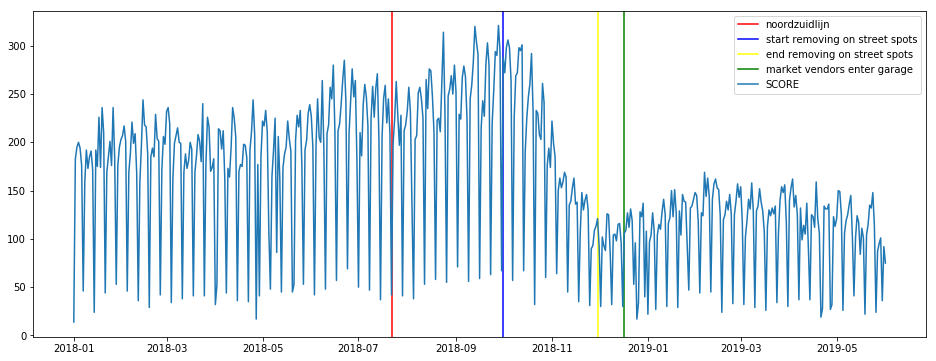

In [5125]:
figure(figsize=(16,6))
x8 = aggs_npr.index;
y8 = aggs_npr.SCORE


plt.axvline(dt.datetime(2018, 7, 22),label='noordzuidlijn',color='red')
plt.axvline(dt.datetime(2018, 10, 1),label='start removing on street spots',color='blue')
plt.axvline(dt.datetime(2018, 11, 30),label='end removing on street spots',color='yellow')
plt.axvline(dt.datetime(2018, 12, 17),label='market vendors enter garage',color='green')

plt.plot(x8, y8)
plt.legend()

## 

## Albert Cuyp Parking Garage data
Visitors, Permitholders, and Subscriptions

In [5124]:
filename = 'milou_AC.xlsx'
folder = r'/Users/miloubisseling/Documents/UvA/DataScience/Thesis/'

path = folder + filename
raw_garagedata = pd.read_excel(path,sheet_name='ParkingTransaction')

In [5112]:
raw_garagedata['Entry_DT_UTC'] = pd.to_datetime(raw_garagedata['Entry_DT_UTC'])

In [5126]:
raw_data = raw_garagedata[(raw_garagedata['Entry_DT_UTC'] > '2018-04-01')&(raw_garagedata['Entry_DT_UTC'] < '2019-05-01')]
raw_data['PermitHolder'] = np.where(raw_data['SubscriptionModel'] == 'SHPV', 1,0)
raw_data['Visitor'] = np.where((raw_data['SubscriptionModel'] == 'Passanten') | (raw_data['SubscriptionModel'] == 'Passanten Dip In Uit'), 1,0)
raw_data = raw_data.set_index(['Entry_DT_UTC'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5127]:
aggs_raw_permitholders = raw_data.resample('D').apply({'PermitHolder':'sum'})
aggs_raw_visitors = raw_data.resample('D').apply({'Visitor':'sum'})

In [5128]:
aggs_raw2=pd.merge(aggs_raw_visitors, aggs_raw_permitholders, left_index=True, right_index=True)
aggs_raw2['PermitHolder AND Visitor'] = aggs_raw2['PermitHolder']+aggs_raw2['Visitor']
aggs_raw2['ALL'] = aggs_raw2['PermitHolder AND Visitor']+aggs_npr['SCORE']
aggs_raw2['ALL VISITORS'] = aggs_raw2['Visitor']+aggs_npr['SCORE']

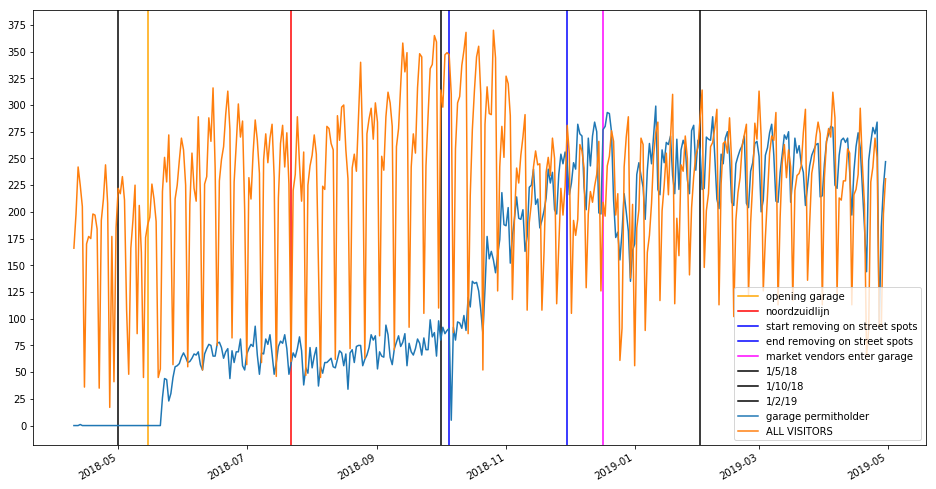

In [5138]:
figure(figsize=(16,8))
x = aggs_raw2.index;
y = aggs_raw2['PermitHolder']
x1 = aggs_raw2.index;
y1 = aggs_raw2['Visitor']
x2 = aggs_raw2.index;
y2 = aggs_raw2['PermitHolder AND Visitor']
x3 = aggs_npr.index;
y3 = aggs_npr.SCORE
x4 = aggs_raw2.index;
y4 = aggs_raw2['ALL']
x5 = aggs_raw2.index;
y5 = aggs_raw2['ALL VISITORS']
plt.xticks(rotation=30, horizontalalignment='right')
plt.yticks(np.arange(0,1000,step=25))
plt.axvline(dt.datetime(2018, 5, 15),label='opening garage',color='orange')
plt.axvline(dt.datetime(2018, 7, 22),label='noordzuidlijn',color='red')
plt.axvline(dt.datetime(2018, 10, 5),label='start removing on street spots',color='blue')
plt.axvline(dt.datetime(2018, 11, 30),label='end removing on street spots',color='blue')
plt.axvline(dt.datetime(2018, 12, 17),label='market vendors enter garage',color='magenta')

plt.axvline(dt.datetime(2018, 5, 1),label='1/5/18',color='black')
plt.axvline(dt.datetime(2018, 10, 1),label='1/10/18',color='black')
plt.axvline(dt.datetime(2019, 2, 1),label='1/2/19',color='black')

plt.plot(x, y,label='garage permitholder')
# plt.plot(x1, y1,label='garage visitor')
# plt.plot(x2, y2,label='garage permitholder AND visitor')
# plt.plot(x3, y3,label='npr visitor')
# plt.plot(x4, y4,label='all')
plt.plot(x5, y5,label='ALL VISITORS')
plt.legend()

In [5159]:
all_visitors = aggs_raw2[['ALL VISITORS']]
npr = aggs_npr[['SCORE']]
x = aggs_raw2.index;
permitholders = aggs_raw2['PermitHolder']
all_parkings = aggs_raw2['ALL']


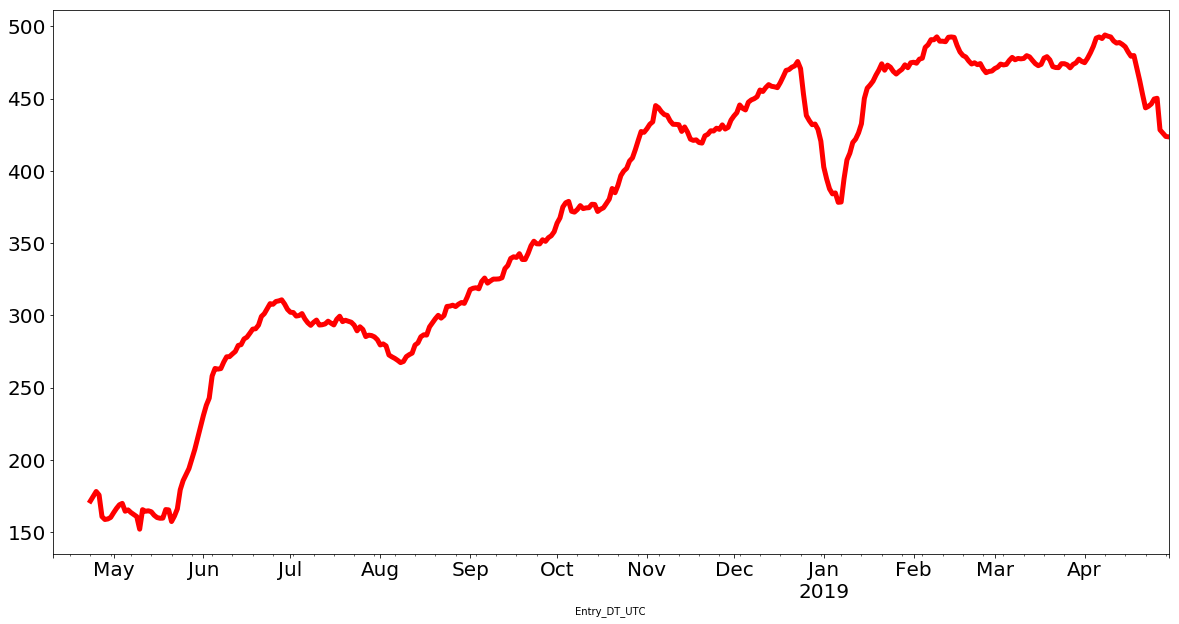

In [5160]:
all_parkings.rolling(14).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='red')

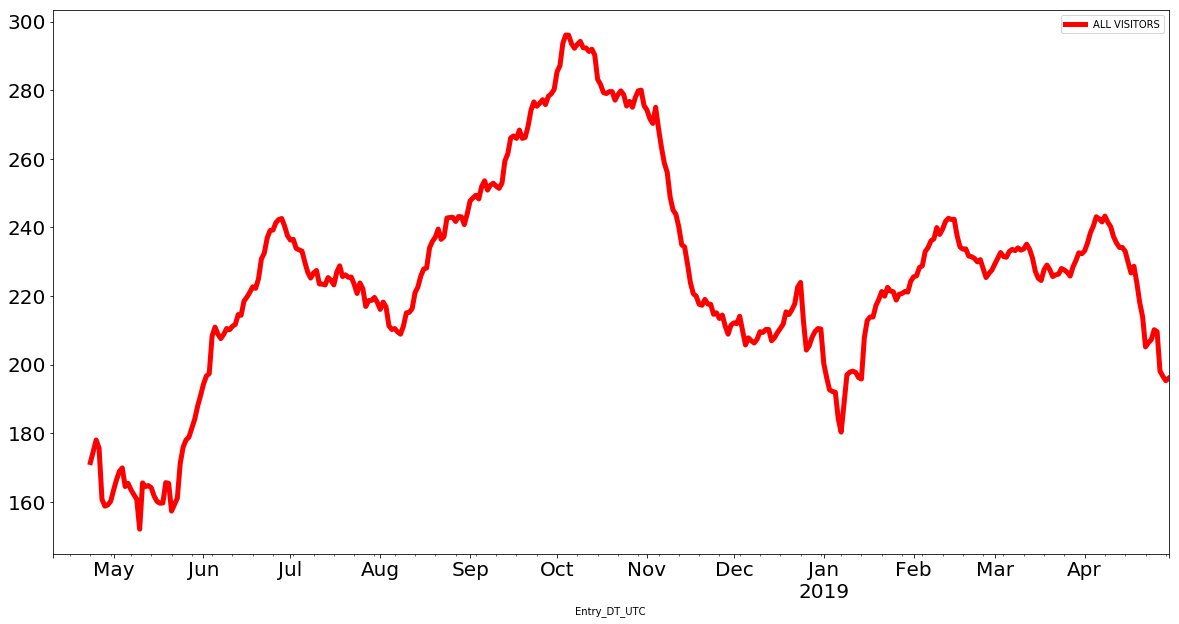

In [5151]:
all_visitors.rolling(14).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='red')

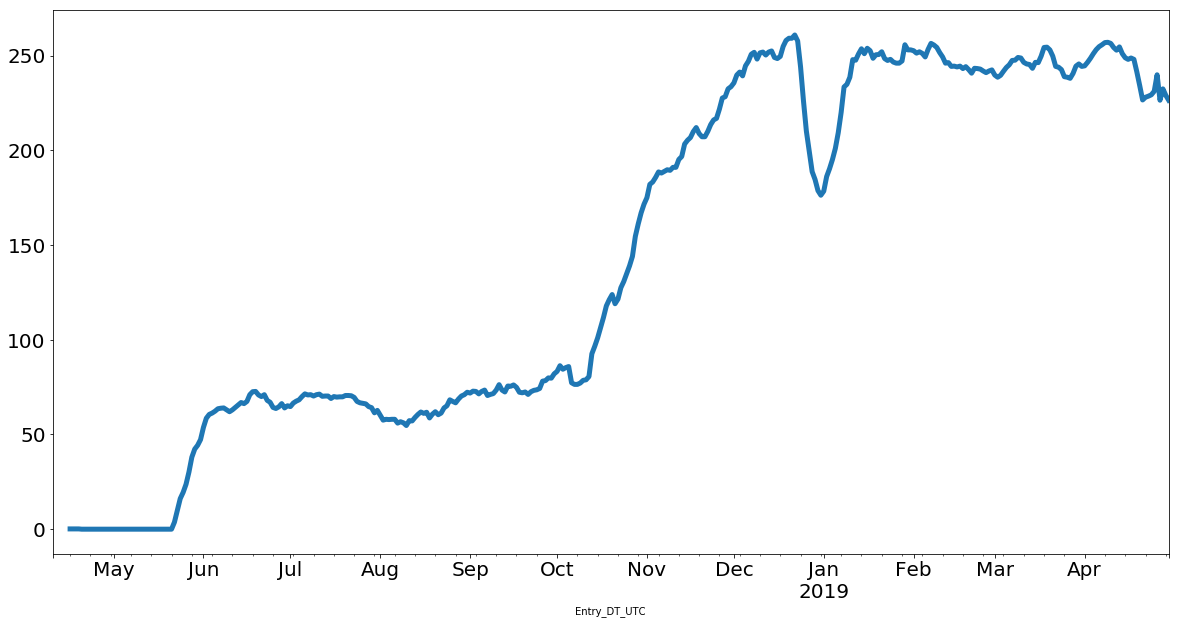

In [5156]:
permitholders.rolling(7).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)

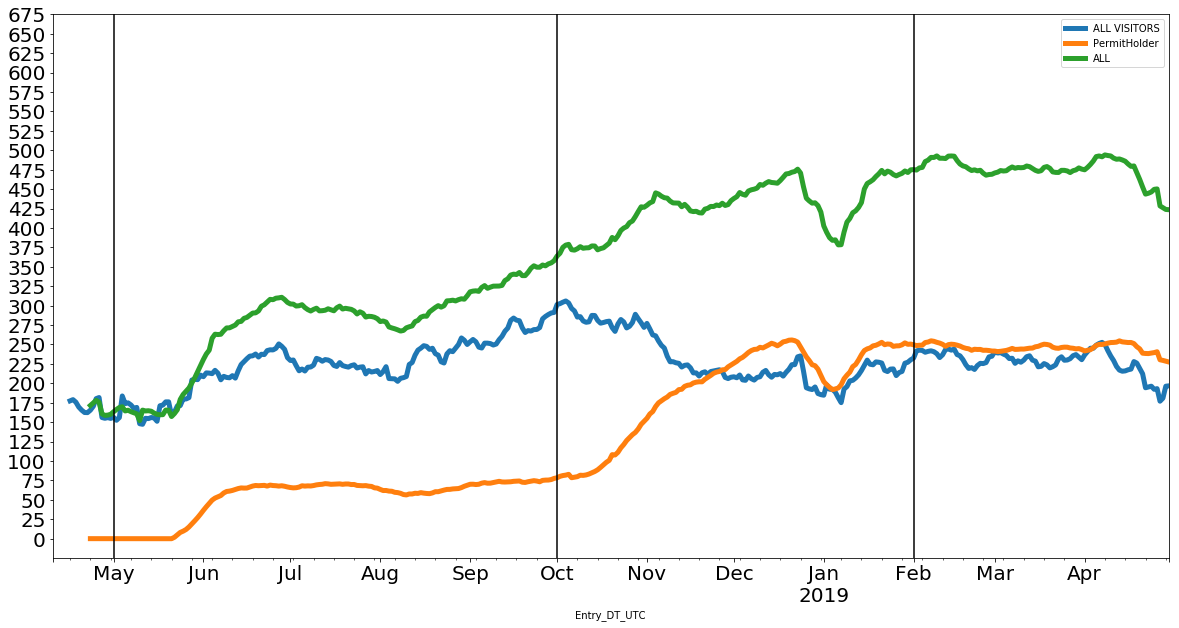

In [5161]:
combi = pd.concat([all_visitors.rolling(7).mean(), permitholders.rolling(14).mean(), all_parkings.rolling(14).mean()], axis=1)
combi.plot(figsize=(20,10), linewidth=5, fontsize=20,yticks =(np.arange(0,700,step=25)))
plt.axvline(dt.datetime(2018, 5, 1),label='1/5/18',color='black')
plt.axvline(dt.datetime(2018, 10, 1),label='1/10/18',color='black')
plt.axvline(dt.datetime(2019, 2, 1),label='1/2/19',color='black')

In [5134]:
filename = 'milou_AC.xlsx'
folder = r'/Users/miloubisseling/Documents/UvA/DataScience/Thesis/'
path = folder + filename
garagedata = pd.read_excel(path)

In [5135]:
garagedata['Date'] = pd.to_datetime(garagedata['Date'])
garagedata['SCORE']=1
data = garagedata[(garagedata['Date'] > '2018-05-16')&(garagedata['Date'] < '2019-02-01')]
data = data.set_index(['Date'])
aggs_permit = data.resample('D').apply({'CustomCounter':'mean'})
aggs_visitor = data.resample('D').apply({'TransientCounter':'mean'})

In [5136]:
aggs_visitor

TransientCounter
Date                        
2018-05-17         15.166667
2018-05-18        119.000000
2018-05-19        119.625000
2018-05-20        120.000000
2018-05-21        120.000000
2018-05-22         51.041667
2018-05-23          3.708333
2018-05-24          2.166667
2018-05-25          6.333333
2018-05-26         12.333333
2018-05-27          4.916667
2018-05-28          8.166667
2018-05-29          6.666667
2018-05-30          7.083333
2018-05-31          5.916667
2018-06-01          2.666667
2018-06-02          5.875000
2018-06-03          4.583333
2018-06-04          1.708333
2018-06-05          0.500000
2018-06-06          1.208333
2018-06-07          1.583333
2018-06-08          2.458333
2018-06-09          4.875000
2018-06-10          4.375000
2018-06-11          4.583333
2018-06-12          0.875000
2018-06-13          4.791667
2018-06-14          3.250000
2018-06-15          5.833333
...                      ...
2019-01-02          7.458333
2019-01-03          9.000000
2019-01-04         15.500000
2019-01-05         17.583333
2019-01-06          7.291667
2019-01-07          5.291667
2019-01-08          4.958333
2019-01-09          9.000000
2019-01-10         13.083333
2019-01-11         14.250000
2019-01-12         15.875000
2019-01-13          9.500000
2019-01-14          7.541667
2019-01-15         10.416667
2019-01-16          9.750000
2019-01-17          9.375000
2019-01-18         11.833333
2019-01-19         16.916667
2019-01-20          6.250000
2019-01-21          4.833333
2019-01-22          7.541667
2019-01-23          8.916667
2019-01-24          8.416667
2019-01-25         12.083333
2019-01-26         13.000000
2019-01-27          4.333333
2019-01-28          7.000000
2019-01-29         10.625000
2019-01-30         12.666667
2019-01-31         15.208333

[260 rows x 1 columns]

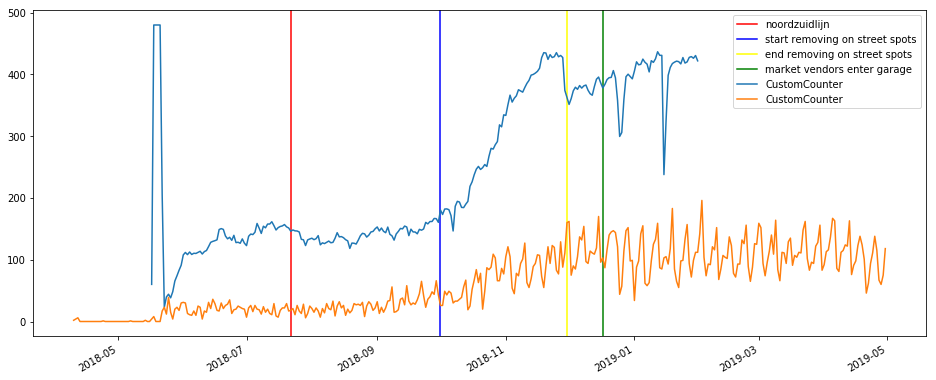

In [5137]:
figure(figsize=(16,6))
x = aggs_permit.index;
y = aggs_permit.CustomCounter
# y2 = aggs_visitor.TransientCounter
plt.xticks(rotation=30, horizontalalignment='right')
plt.axvline(dt.datetime(2018, 7, 22),label='noordzuidlijn',color='red')
plt.axvline(dt.datetime(2018, 10, 1),label='start removing on street spots',color='blue')
plt.axvline(dt.datetime(2018, 11, 30),label='end removing on street spots',color='yellow')
plt.axvline(dt.datetime(2018, 12, 17),label='market vendors enter garage',color='green')
plt.plot(x, y, y1)
plt.legend()

# Occupancy frans halsbuurt npr

In [5948]:
filename = 'NPR_PRC_Stacked_Occupation.csv'
folder = r'/Users/miloubisseling/Documents/UvA/DataScience/Thesis/datascience-thesis/data/npr/'
path = folder + filename
npr_occ = pd.read_csv(path,sep=';')
npr_occ['B_TYD_V_RECHT'] = pd.to_datetime(npr_occ['B_TYD_V_RECHT'])
npr_occ['E_TYD_V_RECHT'] = pd.to_datetime(npr_occ['E_TYD_V_RECHT'])
npr_occ['total'] = npr_occ.cumsum(axis = 0)
npr_occ = npr_occ.loc[npr_occ['buurtcode'] == 'K24c']

# Similar neighborhoods

## Kerncijfers Wijken en Buurten (KWB data)

In [4]:
filename = 'kwb-2018.xls'
folder = r'/Users/miloubisseling/Documents/UvA/DataScience/Thesis/datascience-thesis/data/neighborhood/'
path = folder + filename
buurtdata = pd.read_excel(path)

In [5]:
amsdata = buurtdata[buurtdata['gm_naam'] == 'Amsterdam']
amsdata = amsdata[amsdata['recs'] == 'Buurt']



In [6]:
amsdata.head()

gwb_code_10  gwb_code_8            regio    gm_naam   recs    gwb_code  \
5158  BU03630000     3630000      Kop Zeedijk  Amsterdam  Buurt  BU03630000   
5159  BU03630001     3630001   Oude Kerk e.o.  Amsterdam  Buurt  BU03630001   
5160  BU03630002     3630002  Burgwallen Oost  Amsterdam  Buurt  BU03630002   
5161  BU03630003     3630003         Nes e.o.  Amsterdam  Buurt  BU03630003   
5162  BU03630004     3630004  BG-terrein e.o.  Amsterdam  Buurt  BU03630004   

     ind_wbi  a_inw  a_man  a_vrouw  a_00_14  a_15_24  a_25_44  a_45_64  \
5158       1   1030    605      425       50      130      540      250   
5159       1    690    390      295       25      115      365      135   
5160       1   1590    860      730      105      250      760      320   
5161       1    360    185      175       20       70      190       65   
5162       1    630    345      280       40       95      275      160   

      a_65_oo  a_ongeh  a_gehuwd  a_gesch  a_verwed  a_w_all  a_nw_all  \
5158       70      800       155       70        15      330       170   
5159       60      550        85       50        15      230       105   
5160      160     1210       255      110        20      515       265   
5161       25      285        55       20         5      125        35   
5162       70      465       125       40        10      160       100   

      a_marok  a_antaru  a_suri  a_tur  a_ov_nw a_geb p_geb a_ste p_ste  a_hh  \
5158        5        10      25     10      120     .     .     .     .   750   
5159        5        10      10     10       75     .     .     .     .   505   
5160       20        20      30     10      190     .     .     .     .  1125   
5161        0         0       5      5       25     .     .     .     .   260   
5162       10         5      15      5       65     .     .     .     .   445   

      a_1p_hh  a_hh_z_k  a_hh_m_k g_hhgro bev_dich  a_woning g_woz p_1gezw  \
5158      530       175        45     1,4    16999       742   361       4   
5159      355       110        35     1,4     7819       486   374       6   
5160      790       230       100     1,4    25530       994   390       4   
5161      185        60        10     1,4     6752       261   501       9   
5162      320        75        45     1,4     7464       398   475       7   

     p_mgezw p_bewndw p_leegsw p_koopw p_huurw p_wcorpw p_ov_hw p_e_o_w  \
5158      96       82       18      20      78        7      71       2   
5159      94       77       23      12      83       29      53       6   
5160      96       83       17      18      79        8      72       3   
5161      91       68       32      29      65        5      59       7   
5162      93       84       16      19      80       37      43       2   

     p_bjj2k p_bjo2k g_ele g_ele_ap g_ele_tw g_ele_hw g_ele_2w g_ele_vw  \
5158      97       3     .        .        .        .        .        .   
5159      86      14     .        .        .        .        .        .   
5160      96       4     .        .        .        .        .        .   
5161      98       2     .        .        .        .        .        .   
5162     100       0     .        .        .        .        .        .   

     g_ele_hu g_ele_ko g_gas g_gas_ap g_gas_tw g_gas_hw g_gas_2w g_gas_vw  \
5158        .        .     .        .        .        .        .        .   
5159        .        .     .        .        .        .        .        .   
5160        .        .     .        .        .        .        .        .   
5161        .        .     .        .        .        .        .        .   
5162        .        .     .        .        .        .        .        .   

     g_gas_hu g_gas_ko p_stadsv a_inkont g_ink_po g_ink_pi p_ink_li p_ink_hi  \
5158        .        .        .        .        .        .        .        .   
5159        .        .        .        .        .        .        .        .   
5160        .        .        .        .        .        .        .      

In [7]:
len(amsdata)

479

In [8]:
df_buurtcodecbs_buurtnaam = amsdata[['gwb_code_8','regio']]


In [9]:
buurt_buurtcode=amsdata[['gwb_code_8','regio']]
buurt_buurtcode = buurt_buurtcode.set_index(['gwb_code_8'])

In [10]:
buurt_buurtcode.head()

regio
gwb_code_8                 
3630000         Kop Zeedijk
3630001      Oude Kerk e.o.
3630002     Burgwallen Oost
3630003            Nes e.o.
3630004     BG-terrein e.o.

In [11]:
bevolking = ['a_inw','a_man','a_vrouw','a_00_14','a_15_24','a_25_44','a_45_64','a_65_oo','a_ongeh','a_gehuwd','a_hh','a_1p_hh','a_hh_z_k','a_hh_m_k','g_hhgro','bev_dich']
wonen = ['a_woning','g_woz','p_1gezw','p_mgezw','p_koopw','p_huurw','p_leegsw','p_bewndw']
bedrijfsvestigingen = ['a_bedv','a_bed_a','a_bed_bf','a_bed_gi','a_bed_hj','a_bed_kl','a_bed_mn','a_bed_ru']
motorvoertuigen = ['a_pau','g_pau_hh','g_pau_km']
voorzieningen = ['g_afs_hp','g_afs_gs','g_afs_kv','g_afs_sc','g_3km_sc']
oppervlakte = ['a_opp_ha','a_lan_ha','a_wat_ha']
stedelijkheid = ['ste_mvs','ste_oad']

In [12]:
pd.set_option('display.max_columns', 500)

In [13]:
amsdata_select=amsdata[['gwb_code_8']+bevolking+bedrijfsvestigingen+motorvoertuigen+oppervlakte+stedelijkheid]

In [14]:
amsdata_select = amsdata_select.apply(pd.to_numeric,errors='coerce',downcast='integer')

In [15]:
amsdata_select = amsdata_select.set_index(['gwb_code_8'])

In [16]:
amsdata_select = amsdata_select.dropna(axis='columns')

In [17]:
franshalsbuurt = pd.DataFrame(amsdata_select.loc[amsdata_select.index == 3632402])

In [18]:
ary = scipy.spatial.distance.cdist(amsdata_select, franshalsbuurt, metric='euclidean')
amsdata_select[ary==ary.min()]

a_inw  a_man  a_vrouw  a_00_14  a_15_24  a_25_44  a_45_64  \
gwb_code_8                                                              
3632402      2615   1300     1315      240      270     1330      560   

            a_65_oo  a_ongeh  a_gehuwd  a_hh  a_1p_hh  a_hh_z_k  a_hh_m_k  \
gwb_code_8                                                                  
3632402         220     1985       425  1735     1135       385       225   

            a_pau  a_opp_ha  a_lan_ha  a_wat_ha  
gwb_code_8                                       
3632402       535        12        11         1

In [19]:
amsdata_select['eucledian_distance']=scipy.spatial.distance.cdist(amsdata_select, franshalsbuurt, metric='euclidean')

In [20]:
amsdata_select.sort_values(by=['eucledian_distance']).head()


a_inw  a_man  a_vrouw  a_00_14  a_15_24  a_25_44  a_45_64  \
gwb_code_8                                                              
3632402      2615   1300     1315      240      270     1330      560   
3632403      2580   1305     1275      215      335     1275      540   
3632400      2570   1310     1260      315      315     1160      585   
3635401      2750   1305     1445      290      350     1220      580   
3632500      2515   1180     1330      180      295     1115      530   

            a_65_oo  a_ongeh  a_gehuwd  a_hh  a_1p_hh  a_hh_z_k  a_hh_m_k  \
gwb_code_8                                                                  
3632402         220     1985       425  1735     1135       385       225   
3632403         225     2005       390  1760     1210       355       205   
3632400         205     1915       495  1605      990       355       275   
3635401         315     1985       475  1710     1015       415       290   
3632500         405     1765       435  1735     1195       360       195   

            a_pau  a_opp_ha  a_lan_ha  a_wat_ha  eucledian_distance  
gwb_code_8                                                           
3632402       535        12        11         1            0.000000  
3632403       425         8         8         0          180.141611  
3632400       610        14        12         2          315.128545  
3635401       740        23        19         4          361.170320  
3632500       455        12        11         2          412.584537

In [21]:
df_merged = buurt_buurtcode.merge(amsdata_select, how='outer', left_index=True, right_index=True)

In [22]:
df_merged.sort_values(by=['eucledian_distance']).head()

regio  a_inw  a_man  a_vrouw  a_00_14  a_15_24  \
gwb_code_8                                                                   
3632402           Frans Halsbuurt   2615   1300     1315      240      270   
3632403     Hercules Seghersbuurt   2580   1305     1275      215      335   
3632400               Hemonybuurt   2570   1310     1260      315      315   
3635401            Rijnbuurt Oost   2750   1305     1445      290      350   
3632500         Willibrordusbuurt   2515   1180     1330      180      295   

            a_25_44  a_45_64  a_65_oo  a_ongeh  a_gehuwd  a_hh  a_1p_hh  \
gwb_code_8                                                                
3632402        1330      560      220     1985       425  1735     1135   
3632403        1275      540      225     2005       390  1760     1210   
3632400        1160      585      205     1915       495  1605      990   
3635401        1220      580      315     1985       475  1710     1015   
3632500        1115      530      405     1765       435  1735     1195   

            a_hh_z_k  a_hh_m_k  a_pau  a_opp_ha  a_lan_ha  a_wat_ha  \
gwb_code_8                                                            
3632402          385       225    535        12        11         1   
3632403          355       205    425         8         8         0   
3632400          355       275    610        14        12         2   
3635401          415       290    740        23        19         4   
3632500          360       195    455        12        11         2   

            eucledian_distance  
gwb_code_8                      
3632402               0.000000  
3632403             180.141611  
3632400             315.128545  
3635401             361.170320  
3632500             412.584537

In [23]:
df_merged = df_merged.rename(index=str, columns={"regio": "buurt"})

## NPR cluster data

In [24]:
filename = 'npr_occupation_clusters_latest.csv'
folder = r'/Users/miloubisseling/Documents/UvA/DataScience/Thesis/datascience-thesis/data/clustering/'
path = folder + filename
npr_clusters = pd.read_csv(path)

In [923]:
# npr_clusters = npr_clusters.drop("Unnamed: 0", axis=1)
npr_clusters = npr_clusters.sort_values(by=['cluster'])
npr_clusters

buurtcode  cluster                          buurt oppervlakte in ha  \
0        A00a        0                    Kop Zeedijk            8,0440   
53       N60b        0              Bloemenbuurt Zuid           37.1024   
52       K91c        0         Buitenveldert Zuidoost           64.3379   
51       N69c        0                     Loenermark           17.1049   
50       N69j        0            Buikslotermeerplein           23.4426   
49       E39c        0             Kolenkitbuurt Zuid           12.8017   
48       A07h        0            Frederikspleinbuurt           15.5963   
54       A04a        0               Oosterdokseiland           24.2934   
47       K91b        0      Buitenveldert Oost Midden           29.8525   
44       K44f        0      Bedrijventerrein Schinkel           38.0235   
43       K23e        0                        Vivaldi           28.9876   
42       K23d        0                    Zuidas Zuid           21.6787   
41       K23c        0                    VU-kwartier           46.3314   
40       K23a        0                   Zuidas Noord           82.6131   
39       F89c        0                  Staalmanbuurt           32.1291   
46       K91a        0                De Klenckebuurt           13.8962   
55       M58j        0            Amstelkwartier West           25.5525   
56       M58i        0            Amstelkwartier Zuid           24.3474   
57       M58h        0                       De Omval           14.7958   
72       M33k        0  Bedrijvengebied Zeeburgerkade            9.9564   
71       N71g        0                  Buiksloterham           65.8589   
70       M34e        0         Nieuwe Diep/Diemerpark           239.996   
69       A06e        0                 Zaagpoortbuurt            3.7919   
68       M34f        0                RI Oost terrein           42.1903   
67       A06c        0               Bloemgrachtbuurt           12.7127   
66       M33i        0        Bedrijvengebied Veelaan            5.1211   
65       A00b        0                 Oude Kerk e.o.            9.2593   
64       N72a        0   Bedrijventerrein Hamerstraat           49.9312   
63       A02a        0               Langestraat e.o.           12.3342   
62       N71c        0                Papaverweg e.o.           69,5280   
..        ...      ...                            ...               ...   
210      M56e        2     Sportpark Middenmeer Noord           25.1034   
211      M55d        2                      Don Bosco           16.2478   
201      M55e        2                    Frankendael           29.0357   
213      E37f        2                 Gibraltarbuurt           20.0076   
188      M56f        2                   Park De Meer           26.3619   
186      K52h        2                     Kop Zuidas           16.9382   
164      M58g        2           Amstelkwartier Noord           36.8247   
165      A04d        2                        Lastage            7.7727   
166      A04b        2           Scheepvaarthuisbuurt           10.7906   
167      A03g        2              Leidsegracht Zuid            6.8641   
168      A03f        2                 Reguliersbuurt            4.5496   
169      A03e        2            Rembrandtpleinbuurt            7.6807   
170      A03d        2                Amstelveldbuurt           14,7860   
171      A03c        2                  Van Loonbuurt           15.3352   
172      A03b        2                   Gouden Bocht            5.5532   
173      M57a        2                      Betondorp           45,7990   
187      M56h        2             Science Park Noord           41.7968   
174      A03a        2                   Spiegelbuurt            9.4255   
176      A01g        2                 Begijnhofbuurt            7.0622   
177      A01f        2                Spuistraat Zuid            6.7152   
178      A01e        2               Nieuwe Kerk e.o.            8,4210   
179      A01d        2       

In [28]:
# capitalize to merge with other file using buurtcode starting with a capital
npr_clusters['buurtcode']=npr_clusters['buurtcode'].str.capitalize()

In [39]:
cluster_num_frans_halsbuurt = npr_clusters.loc[npr_clusters['buurtcode'] == 'K24c','cluster'].item()

In [40]:
filename = '2018_buurten_ois_kerncijfers.xlsx'
folder = r'/Users/miloubisseling/Documents/UvA/DataScience/Thesis/datascience-thesis/data/neighborhood/'
path = folder + filename
buurten_kerncijfers = pd.read_excel(path,header=2)

In [41]:
buurten_kerncijfers.head()

buurt oppervlakte in ha oppervlakte in ha land bevolking  \
0                   NaN               NaN                    NaN       NaN   
1      A00a Kop Zeedijk            8,0440                 5.9833      1032   
2   A00b Oude Kerk e.o.            9.2593                 8.8691       689   
3  A00c Burgwallen Oost            7.2486                 6.2334      1589   
4         A00d Nes e.o.            5.7761                 5.3952       361   

  bevolkingsdichtheid per km2 land woningen woningdichtheid per km2 land  \
0                              NaN      NaN                          NaN   
1                            17248      742                        12401   
2                             7769      485                         5468   
3                            25492      994                        15946   
4                             6691      261                         4838   

  gemiddelde woningbezetting  
0                        NaN  
1                       1.39  
2                       1.42  
3                       1,60  
4                       1.38

In [42]:
# dropping null value columns to avoid errors 
buurten_kerncijfers.dropna(inplace = True) 
buurten_kerncijfers["buurtcode"] = buurten_kerncijfers['buurt'].str[0:4]
buurten_kerncijfers["buurt"] = buurten_kerncijfers['buurt'].str[5:]

In [43]:
npr_clusters = npr_clusters.merge(buurten_kerncijfers, left_on='buurtcode',right_on='buurtcode')

npr_cluster_2 = npr_clusters['cluster'] == cluster_num_frans_halsbuurt
# npr_cluster_2 = npr_clusters['cluster'] == 2

npr_cluster_2 = npr_clusters[npr_cluster_2]
npr_cluster_2 = npr_cluster_2.sort_values('buurtcode')

# npr_cluster_2 = npr_clusters[npr_cluster_2]
# npr_cluster_2 = npr_cluster_2.sort_values('buurtcode')

# npr_cluster_0_2 = pd.concat([npr_cluster_0, npr_cluster_2])

In [44]:
npr_cluster_2

buurtcode  cluster                             buurt oppervlakte in ha  \
184      A00c        2                   Burgwallen Oost            7.2486   
183      A00d        2                          Nes e.o.            5.7761   
181      A00e        2                   BG-terrein e.o.           10,1390   
180      A01b        2                         Hemelrijk            6.2942   
179      A01d        2                  Spuistraat Noord            5.6778   
178      A01e        2                  Nieuwe Kerk e.o.            8,4210   
177      A01f        2                   Spuistraat Zuid            6.7152   
176      A01g        2                    Begijnhofbuurt            7.0622   
175      A02c        2                Felix Meritisbuurt           20.3112   
185      A02d        2                Leidsegracht Noord            6.9061   
174      A03a        2                      Spiegelbuurt            9.4255   
172      A03b        2                      Gouden Bocht            5.5532   
171      A03c        2                     Van Loonbuurt           15.3352   
170      A03d        2                   Amstelveldbuurt           14,7860   
169      A03e        2               Rembrandtpleinbuurt            7.6807   
168      A03f        2                    Reguliersbuurt            4.5496   
167      A03g        2                 Leidsegracht Zuid            6.8641   
166      A04b        2              Scheepvaarthuisbuurt           10.7906   
165      A04d        2                           Lastage            7.7727   
205      A04e        2                        Nieuwmarkt            7,1190   
198      A04f        2                         Uilenburg           10.6896   
197      A04h        2                   Zuiderkerkbuurt            9.1025   
196      A04i        2                Waterloopleinbuurt           12.9563   
195      A05a        2                  Westerdokseiland           33.7834   
194      A05b        2              Haarlemmerbuurt Oost           10.1251   
193      A05c        2              Haarlemmerbuurt West           11.7314   
192      A05d        2               Westelijke Eilanden           21.6518   
191      A05f        2               Planciusbuurt Noord            2,4170   
190      A05g        2                Planciusbuurt Zuid            1.7356   
189      A06a        2                     Driehoekbuurt           10.6088   
..        ...      ...                               ...               ...   
122      M32a        2  Noordoostkwadrant Indische Buurt           26.6985   
124      M32b        2   Zuidoostkwadrant Indische Buurt           14.0405   
134      M32c        2                Zeeburgerdijk Oost           12.6938   
135      M32d        2                         Flevopark           76.0023   
126      M33b        2                        Rietlanden           34.4096   
127      M33c        2                       Java-eiland           71.3294   
128      M33d        2                       KNSM-eiland           103.479   
129      M33e        2                        Sporenburg           36.4393   
130      M33f        2                            Borneo           26.7324   
131      M33g        2                Entrepot-Noordwest           12,7340   
132      M33h        2                  Architectenbuurt           14.2169   
113      M33j        2       Bedrijvengebied Cruquiusweg           31,0470   
200      M55c        2                       Julianapark           19.2062   
211      M55d        2                         Don Bosco           16.2478   
201      M55e        2                       Frankendael           29.0357   
202      M55f        2            Tuindorp Amstelstation           11.0046   
203      M55g        2                       De Wetbuurt           28.7602   
204      M55h        2              Tuindorp Frankendael           36.0599   
206      M56a        2                 Linnaeusparkbuurt           17,8300   
207      M56b        2    

In [45]:
path = '/Users/miloubisseling/Documents/UvA/DataScience/Thesis/2018-cbs-pc6huisnr20180801_buurt/pc6hnr20180801_gwb-vs2.csv'
df_buurt_pc = pd.read_csv(path,delimiter=';')

In [46]:
df_buurt_pc['PC4'] = df_buurt_pc['PC6'].str.slice(0, 4, 1) 

In [47]:
df_buurt_pc4 = df_buurt_pc[['PC4','Buurt2018']]

In [48]:
df_buurt_pc4.head()

PC4  Buurt2018
0  1011    3630400
1  1011    3630400
2  1011    3630400
3  1011    3630400
4  1011    3630400

In [49]:
df_buurt_pc4 = df_buurt_pc4.rename(index=str, columns={"Buurt2018": "buurtcode"})
df_buurtcodecbs_buurtnaam = df_buurtcodecbs_buurtnaam.rename(index=str, columns={"gwb_code_8": "buurtcode"})

In [50]:
df_buurt_pc4 = df_buurt_pc4.drop_duplicates(subset='buurtcode')

In [51]:
df_buurtcodecbs_buurtcodeams = pd.merge(df_buurtcodecbs_buurtnaam,df_buurt_pc4,how='inner',left_on='buurtcode',right_on='buurtcode')

In [924]:
df_buurtcodecbs_buurtcodeams

buurtcode_x                        buurt   PC4 buurtcode_y  cluster  \
17       3630401         Scheepvaarthuisbuurt  1011        A04b        2   
18       3630403                      Lastage  1011        A04d        2   
19       3630404                   Nieuwmarkt  1011        A04e        2   
20       3630405                    Uilenburg  1011        A04f        2   
21       3630407              Zuiderkerkbuurt  1011        A04h        2   
22       3630408           Waterloopleinbuurt  1011        A04i        2   
50       3630908                     Kadijken  1011        A09i        2   
0        3630002              Burgwallen Oost  1012        A00c        2   
1        3630003                     Nes e.o.  1012        A00d        2   
2        3630004              BG-terrein e.o.  1012        A00e        2   
3        3630101                    Hemelrijk  1012        A01b        2   
4        3630103             Spuistraat Noord  1012        A01d        2   
5        3630104             Nieuwe Kerk e.o.  1012        A01e        2   
6        3630105              Spuistraat Zuid  1012        A01f        2   
7        3630106               Begijnhofbuurt  1012        A01g        2   
23       3630500             Westerdokseiland  1013        A05a        2   
24       3630501         Haarlemmerbuurt Oost  1013        A05b        2   
25       3630502         Haarlemmerbuurt West  1013        A05c        2   
26       3630505          Planciusbuurt Noord  1013        A05f        2   
27       3630506           Planciusbuurt Zuid  1013        A05g        2   
51       3631300               Zeeheldenbuurt  1013        E13a        2   
52       3631301  Spaarndammerbuurt Noordoost  1013        E13b        2   
53       3631302   Spaarndammerbuurt Zuidoost  1013        E13c        2   
54       3631303   Spaarndammerbuurt Zuidwest  1013        E13d        2   
55       3631304     Spaarndammerbuurt Midden  1013        E13e        2   
56       3631305  Spaarndammerbuurt Noordwest  1013        E13f        2   
57       3631306             Westergasfabriek  1013        E13g        2   
28       3630600                Driehoekbuurt  1015        A06a        2   
29       3630603            Marnixbuurt Noord  1015        A06d        2   
35       3630610         Anjeliersbuurt Noord  1015        A06k        2   
..           ...                          ...   ...         ...      ...   
171      3635403               Rijnbuurt West  1079        K54d        2   
96       3632700              Swammerdambuurt  1091        M27a        2   
97       3632701     Weesperzijde Midden/Zuid  1091        M27b        2   
98       3632702               Parooldriehoek  1091        M27c        2   
99       3632800    Oosterparkbuurt Noordwest  1091        M28a        2   
102      3632803     Oosterparkbuurt Zuidwest  1091        M28d        2   
105      3633000          Transvaalbuurt West  1091        M30a        2   
100      3632801                   Oosterpark  1092        M28b        2   
101      3632802     Oosterparkbuurt Zuidoost  1092        M28c        2   
106      3633001          Transvaalbuurt Oost  1092        M30b        2   
103      3632901             Dapperbuurt Zuid  1093        M29b        2   
104      3632902                    Oostpoort  1093        M29c        2   
107      3633202           Zeeburgerdijk Oost  1095        M32c        2   
108      3633203                    Flevopark  1095        M32d        2   
187      3635806         Amstelkwartier Noord  1096        M58g        2   
172      3635502                  Julianapark  1097        M55c        2   
173      3635503                    Don Bosco  1097        M55d        2   
174      3635504                  Frankendael  1097        M55e        2   
175      3635505       Tuindorp Amstelstation  1097        M55f        2   
176      3635506                  De Wetbuurt  1097        M55g        2   
177      3635507         Tuindorp Frankendael  1097  

In [53]:
df_buurtcodecbs_buurtcodeams = df_buurtcodecbs_buurtcodeams.rename(index=str, columns={"regio": "buurt"})

In [55]:
df_buurtcodecbs_buurtcodeams = pd.merge(df_buurtcodecbs_buurtcodeams,npr_cluster_2,how='inner',left_on='buurt',right_on='buurt')

In [56]:
df_buurtcodecbs_buurtcodeams = df_buurtcodecbs_buurtcodeams.sort_values(['PC4','buurtcode_y'])

In [59]:
cluster2_pcs = df_buurtcodecbs_buurtcodeams['PC4'].unique()
cluster2_pcs = list(cluster2_pcs)
len(cluster2_pcs)

34

In [60]:
buurtcode_list = df_buurtcodecbs_buurtcodeams['buurtcode_x'].to_list()

In [61]:
buurtcode_list

[3630401,
 3630403,
 3630404,
 3630405,
 3630407,
 3630408,
 3630908,
 3630002,
 3630003,
 3630004,
 3630101,
 3630103,
 3630104,
 3630105,
 3630106,
 3630500,
 3630501,
 3630502,
 3630505,
 3630506,
 3631300,
 3631301,
 3631302,
 3631303,
 3631304,
 3631305,
 3631306,
 3630600,
 3630603,
 3630610,
 3630611,
 3630202,
 3630203,
 3630605,
 3630606,
 3630607,
 3630608,
 3630609,
 3630300,
 3630301,
 3630302,
 3630303,
 3630304,
 3630305,
 3630306,
 3630700,
 3630701,
 3630702,
 3630703,
 3630706,
 3630804,
 3630900,
 3630901,
 3630902,
 3630903,
 3630904,
 3630905,
 3630907,
 3633301,
 3633302,
 3633303,
 3633304,
 3633305,
 3633306,
 3633307,
 3633309,
 3637107,
 3631402,
 3631403,
 3631404,
 3631405,
 3631500,
 3631501,
 3631502,
 3631503,
 3631400,
 3631401,
 3631600,
 3631601,
 3631602,
 3631700,
 3631800,
 3631801,
 3631900,
 3631901,
 3631902,
 3632000,
 3632001,
 3632002,
 3632100,
 3632101,
 3632200,
 3632201,
 3633702,
 3633703,
 3633704,
 3633705,
 3633706,
 3633802,
 3633900,


In [63]:
cluster2_pcs

['1011',
 '1012',
 '1013',
 '1015',
 '1016',
 '1017',
 '1018',
 '1019',
 '1031',
 '1051',
 '1052',
 '1053',
 '1054',
 '1055',
 '1056',
 '1057',
 '1058',
 '1059',
 '1071',
 '1072',
 '1073',
 '1074',
 '1075',
 '1076',
 '1077',
 '1078',
 '1079',
 '1091',
 '1092',
 '1093',
 '1095',
 '1096',
 '1097',
 '1098']

In [64]:
df_sim_neigh = pd.merge(df_merged, df_buurtcodecbs_buurtcodeams,how='inner',left_on='buurt',right_on='buurt')

In [65]:
df_sim_neigh= df_sim_neigh.sort_values(by=['eucledian_distance'])

In [66]:
# df_sim_neigh['PC4'].value_counts()

In [67]:
df_sim_neigh[['buurt','PC4','eucledian_distance']]
sim_neigh_list = list(df_sim_neigh['PC4'])
len(sim_neigh_list)

196

# OViN data

## OViN extract excel files
Variabele namen
* BHvm = Hoofdvervoermiddel beroepsmatige verplaatsing
 * Personenauto = 6
 * Bestelwagen/bestelbus = 7
* Hvm = Hoofdvervoermiddel verplaatsing
 * Bestuurder auto = 6
 * Bestelauto = 7
 * (Passagier auto = 10)
* AankPC = Postcode aankomstpunt
* VertPC = Postcode vertrekpunt
* BuurtAdam = Buurt Amsterdam (0 als respondent geen inwoner van gemeente amsterdam is) 
 * Oude Pijp buurtcode = 03630424

In [4598]:
files = ['OViN2015_Databestand.xlsx','OViN2016_Databestand.xlsx','OViN2017_Databestand.xlsx']
pcs = cluster2_pcs
overlapping_neighborhoods = ['1011','1012','1013','1014','1018','1059','1062','1076','1075','1077']
# pcs = cluster2_pcs - overlapping_neighborhoods
pcs = list(set(cluster2_pcs) - set(overlapping_neighborhoods))

# change postal codes list from strings to ints
pcs = list(map(int, pcs))

In [4599]:
print(sorted(pcs))

[1015, 1016, 1017, 1019, 1031, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1071, 1072, 1073, 1074, 1078, 1079, 1091, 1092, 1093, 1095, 1096, 1097, 1098]


In [4600]:
print(len(pcs))

26


In [4601]:
def extract_excel_file(filename,days):
    
    # read in ovin excel data file
    folder = r'/Users/miloubisseling/Documents/UvA/DataScience/Thesis/datascience-thesis/data/ovin/'
    path = folder + filename
    ovin = pd.read_excel(path,parse_dates=True,convert_float=True)
    
    # only keep columns that are used
    ovin = ovin[['OPID','Jaar','Maand','Week','Dag','Weekdag','VerplID','VerplNr','Doel','MotiefV','VertPC','Vertrekp','AankPC','Hvm','BHvm','VertUur','VertMin','AankUur','AankMin','Reisduur','HHPers','HHSam','HHLft1','HHLft2','HHLft3','HHLft4','HHGestInkG','Geslacht','Leeftijd','BetWerk','HHAuto','Rijbewijs','BuurtAdam','ActDuur']]
    
    # select days of the week
    ovin = ovin.loc[ovin['Weekdag'].isin(days)]
    
    # subset of variables that need to be dropped if nan
    subset_list = ['OPID','VerplID','VerplNr','Doel','VertPC','AankPC','VertUur','VertMin','AankUur','AankMin','Jaar','Maand','Dag']
    
    # drop row if nan
    ovin = ovin.dropna(subset=subset_list)
    
    # change type of subset variables to integers
    ovin[subset_list]=ovin[subset_list].astype(int)
    
    # drop if trip is duplicate
    ovin = ovin.drop_duplicates(subset='VerplID',keep='first')

    return ovin

In [4602]:
dataframes = [extract_excel_file(file,[1,2,3,4,5]) for file in files]

In [4603]:
def postal_code_home(ovin):
    
    # add column with postal code area of a person's home
    ovin['WoonPC'] = np.where(((ovin['Vertrekp']==int(1)) &  (ovin['VerplNr']==int(1))), ovin['VertPC'], np.NaN)
    
    # persons with same id have same home
    ovin[['OPID','WoonPC']] = ovin[['OPID','WoonPC']].groupby('OPID').ffill()
    
    return ovin

In [4604]:
postal_codes_homes_added= [postal_code_home(df_excel_extracted) for df_excel_extracted in dataframes]

In [4605]:
def filter_cartrips(ovin):
    
    # car codes in ovin data
    ovin_car_codes = [6,7]
    ovin_business_car_codes = [6,7]
    
    # keep car trips only
    ovin_private_cartrips = ovin[ovin['Hvm'].isin(ovin_car_codes)]
    ovin_business_cartrips = ovin[ovin['BHvm'].isin(ovin_business_car_codes)]
    ovin_cartrips_filtered = ovin_private_cartrips.append(ovin_business_cartrips)
    
    
    return ovin_cartrips_filtered

In [4606]:
cartrips_filtered = [filter_cartrips(dataframe) for dataframe in postal_codes_homes_added]

In [4607]:
cartrips_filtered[0].dtypes

OPID            int64
Jaar            int64
Maand           int64
Week            int64
Dag             int64
Weekdag         int64
VerplID         int64
VerplNr         int64
Doel            int64
MotiefV       float64
VertPC          int64
Vertrekp        int64
AankPC          int64
Hvm           float64
BHvm          float64
VertUur         int64
VertMin         int64
AankUur         int64
AankMin         int64
Reisduur      float64
HHPers          int64
HHSam           int64
HHLft1          int64
HHLft2          int64
HHLft3          int64
HHLft4          int64
HHGestInkG      int64
Geslacht        int64
Leeftijd        int64
BetWerk         int64
HHAuto          int64
Rijbewijs       int64
BuurtAdam       int64
ActDuur       float64
WoonPC        float64
dtype: object

In [4608]:
for i in cartrips_filtered:
    print(len(i))

22315
21627
22765


In [4609]:
def filter_postalcodes(ovin,postalcodes):
    
    # filter on postal codes
    ovin_vert = ovin.loc[ovin['VertPC'].isin(postalcodes)]
    ovin_aank = ovin.loc[ovin['AankPC'].isin(postalcodes)]
    ovin = ovin_aank.append(ovin_vert)
    
    return ovin

In [4610]:
postalcode_filtered = [filter_postalcodes(df_cartrips_filtered,pcs) for df_cartrips_filtered in cartrips_filtered]

In [4611]:
for i in postalcode_filtered:
    print(len(i))

441
378
416


In [4612]:
def strings_to_datetime(ovin):
    
        
    # subset of variables that need to be dropped if nan
    subset_list = ['OPID','VerplID','VerplNr','Doel','VertPC','AankPC','VertUur','VertMin','AankUur','AankMin','Jaar','Maand','Dag']
    
    # change type of subset variables to integers
    ovin[subset_list]=ovin[subset_list].astype(int)
    
    # change columns to integers
    float_columns = ovin.columns[(ovin.dtypes.values == np.dtype('float64'))]
    
    # change type to Int64 bc there are nan's in dataframe
    ovin[float_columns] = ovin[float_columns].astype('Int64')
        
    # get names of indexes for which column hour of departure/arrival has a value higher than 23 and drop those indexes
    indexNames = ovin[(ovin['AankUur'] > 23) | (ovin['AankUur'] > 23)].index
    ovin.drop(indexNames , inplace=True)
    
    # if activity duration is 0 change to 1
    ovin = ovin.sort_values(['OPID','VerplNr'])
    ovin['VertMin'] = np.where((ovin['VertUur'] == ovin['AankUur'].shift()) 
                               & (ovin['VertMin'] == ovin['AankMin'].shift())
                               & (ovin['OPID'] == ovin['OPID'].shift())
                                ,ovin['VertMin']+1,ovin['VertMin'])
    
    print(ovin.dtypes)
    # drop row if time of arrival < time of departure previous trip
    ovin = ovin.sort_values(['OPID','VerplNr'])
    ovin.drop(ovin[(ovin['AankUur'] > ovin['VertUur'].shift(1)) 
                          & (ovin['AankMin'] > ovin['VertMin'].shift(1))
                          & (ovin['OPID'] == ovin['OPID'].shift(1))].index)

    # change date in format yy-mm-dd
    ovin['Datum'] = ovin['Jaar'].astype(str) + '-' + ovin['Maand'].astype(str) + '-' + ovin['Dag'].astype(str)
    
    # change time in timedelta format hh:mm:ss
    ovin['VertTijd'] = ovin['VertUur'].astype(str) + ':' + ovin['VertMin'].astype(str) + ':00'
    ovin['AankTijd'] = ovin['AankUur'].astype(str) + ':' + ovin['AankMin'].astype(str) + ':00'
    
    # change datetime in datetime format yyyy-mm-ddThh:mm:ss
    ovin['VertTijd'] = ovin['Datum']+'T'+ovin['VertTijd']
    ovin['AankTijd'] = ovin['Datum']+'T'+ovin['AankTijd']
    
    # add end time activity
    ovin = ovin.sort_values(['OPID','VerplNr'])
    ovin['VertTijd2']= ovin['VertTijd'].shift(-1)
    
    # change string to datetime
    ovin['Datum'] = pd.to_datetime(ovin['Datum'])
    ovin['AankTijd'] = pd.to_datetime(ovin['AankTijd'])
    ovin['VertTijd'] = pd.to_datetime(ovin['VertTijd'])
    ovin['VertTijd2']= pd.to_datetime(ovin['VertTijd2'])
    
    # calculate activity duration manually  
    # if trips are sequential calculate activity duration (with a maximum of 4 trips in between)
    ovin['Verschil'] = np.where((ovin['VerplID'].shift(-1) == (ovin['VerplID'])+1) 
                                | (ovin['VerplID'].shift(-1) == (ovin['VerplID'])+2) 
                                | (ovin['VerplID'].shift(-1) == (ovin['VerplID'])+3)
                                | (ovin['VerplID'].shift(-1) == (ovin['VerplID'])+4), 'keep', 'drop')
    ovin['Diff'] = ovin['VertTijd2']-ovin['AankTijd']
    ovin['ActDuur2'] = np.where(ovin['Verschil'] == 'keep', ovin['Diff'], np.nan)
    
    # change activity duration 2015-2017 units to timedelta
    if 'ActDuur' in ovin:
        ovin['ActDuur'] = ovin['ActDuur'].fillna(0).astype('int64')
        ovin['ActDuur'] = ovin['ActDuur'].astype(int)
        ovin['ActDuur'] = pd.to_timedelta(ovin['ActDuur'],unit='m',errors='coerce')
        ovin['ActDuur'] = ovin['ActDuur'].replace(pd.Timedelta(0), np.nan)
    else:
        ovin['ActDuur'] = ovin['ActDuur2']
        
    # if activity duration actduur is nan change in manually calculated actduur2
    ovin['ActDuur'] = np.where(ovin['ActDuur'].isnull(), ovin['ActDuur2'],ovin['ActDuur'])
    
    # calculate activity duration in minutes
    ovin['ActMinutes'] = ovin['ActDuur'] / pd.Timedelta('1 minute')
    
    # calculate activity end time which is the arrival time plus activity duration
    ovin['EindTijd'] = ovin['AankTijd'] + ovin['ActDuur']

    return ovin

In [4613]:
time_type_changed = [strings_to_datetime(df_postalcode_filtered) for df_postalcode_filtered in postalcode_filtered]

OPID          int64
Jaar          int64
Maand         int64
Week          int64
Dag           int64
Weekdag       int64
VerplID       int64
VerplNr       int64
Doel          int64
MotiefV       Int64
VertPC        int64
Vertrekp      int64
AankPC        int64
Hvm           Int64
BHvm          Int64
VertUur       int64
VertMin       int64
AankUur       int64
AankMin       int64
Reisduur      Int64
HHPers        int64
HHSam         int64
HHLft1        int64
HHLft2        int64
HHLft3        int64
HHLft4        int64
HHGestInkG    int64
Geslacht      int64
Leeftijd      int64
BetWerk       int64
HHAuto        int64
Rijbewijs     int64
BuurtAdam     int64
ActDuur       Int64
WoonPC        Int64
dtype: object
OPID          int64
Jaar          int64
Maand         int64
Week          int64
Dag           int64
Weekdag       int64
VerplID       int64
VerplNr       int64
Doel          int64
MotiefV       Int64
VertPC        int64
Vertrekp      int64
AankPC        int64
Hvm           Int64
BHvm  

In [4614]:
for i in time_type_changed:
    print(len(i))

439
378
414


In [4615]:
ovin_2015_2017 = pd.concat(time_type_changed,sort=False)

In [4616]:
ovin_2015_2017.sort_values(['OPID','ActMinutes'])

OPID  Jaar  Maand  Week  Dag  Weekdag     VerplID  VerplNr  Doel  \
27352   15107081  2015      2     7   15        1  1510708101        1    11   
28244   15109071  2015      3     9    1        1  1510907101        1    12   
28245   15109071  2015      3     9    1        1  1510907102        2     1   
28184   15110085  2015      3    10    8        1  1511008501        1    11   
28185   15110085  2015      3    10    8        1  1511008502        2     9   
28185   15110085  2015      3    10    8        1  1511008502        2     9   
28186   15110085  2015      3    10    8        1  1511008503        3     1   
14820   15111033  2015      3    11   15        1  1511103302        2     1   
37266   15113082  2015      3    13   29        1  1511308201        1    11   
37266   15113082  2015      3    13   29        1  1511308201        1    11   
37267   15113082  2015      3    13   29        1  1511308202        2     1   
37267   15113082  2015      3    13   29        1  1511308202        2     1   
18464   15114009  2015      4    14    5        1  1511400902        2     1   
18463   15114009  2015      4    14    5        1  1511400901        1    11   
47287   15116092  2015      4    16   19        1  1511609203        3     1   
47285   15116092  2015      4    16   19        1  1511609202        2     8   
61142   15118093  2015      5    18    3        1  1511809301        1    11   
61143   15118093  2015      5    18    3        1  1511809302        2     1   
43730   15119050  2015      5    19   10        1  1511905001        1     9   
43731   15119050  2015      5    19   10        1  1511905002        2     1   
33976   15120021  2015      5    20   17        1  1512002102        2     5   
33977   15120021  2015      5    20   17        1  1512002103        3     8   
28019   15121004  2015      5    21   24        1  1512100404        4    10   
28020   15121004  2015      5    21   24        1  1512100405        5     1   
43075   15124015  2015      6    24   14        1  1512401501        1    12   
43076   15124015  2015      6    24   14        1  1512401502        2     1   
71655   15128115  2015      7    28   12        1  1512811502        2    12   
71656   15128115  2015      7    28   12        1  1512811503        3    12   
74572   15128122  2015      7    28   12        1  1512812203        3     1   
74572   15128122  2015      7    28   12        1  1512812203        3     1   
...          ...   ...    ...   ...  ...      ...         ...      ...   ...   
73967   17533043  2017      8    33   17        5  1753304302        2     1   
73967   17533043  2017      8    33   17        5  1753304302        2     1   
88513   17536102  2017      9    36    7        5  1753610201        1     9   
88514   17536102  2017      9    36    7        5  1753610202        2     8   
88514   17536102  2017      9    36    7        5  1753610202        2     8   
88515   17536102  2017      9    36    7        5  1753610203        3     1   
83893   17537042  2017      9    37   14        5  1753704202        2     5   
83892   17537042  2017      9    37   14        5  1753704201        1     9   
89902   17537069  2017      9    37   14        5  1753706901        1     5   
89905   17537069  2017      9    37   14        5  1753706904        4     5   
89903   17537069  2017      9    37   14        5  1753706902        2     3   
89902   17537069  2017      9    37   14        5  1753706901        1     5   
89906   17537069  2017      9    37   14        5  1753706905        5     1   
89906   17537069  2017      9    37   14        5  1753706905        5     1   
65824   17538020  2017      9    38   21        5  1753802003        3    11   
65825   17538020  2017      9    38   21        5  1753802004        4     1   
66359   17538025  2017      9    38   21        5  1753802502        2     1   
66358   17538025  2017      9    38   21        5  1753802501        1     2   
93271   1753

In [4617]:
len(ovin_2015_2017)

1231

## OViN extract sav files

In [4618]:
files2 = ['OViN2010_Databestand.sav','OViN2011_Databestand.sav','OViN2012_Databestand.sav','OViN2013_Databestand.sav','OViN2014_Databestand.sav']

In [4619]:
def extract_sav_file(filename,days):
    
    # read in ovin excel data file
    folder = r'/Users/miloubisseling/Documents/UvA/DataScience/Thesis/datascience-thesis/data/ovin/'
    path = folder + filename
    ovin, meta = pyreadstat.read_sav(path, dates_as_pandas_datetime=True)
    
    # only keep columns that are used
    ovin = ovin[['OP','OPID','Jaar','Maand','Week','Dag','Weekdag','VerplID','VerplNr','Doel','MotiefV','VertPC','Vertrekp','AankPC','Hvm','BHvm','VertUur','VertMin','AankUur','AankMin','Reisduur','HHPers','HHSam','HHLft1','HHLft2','HHLft3','HHLft4','HHGestInkG','Geslacht','Leeftijd','BetWerk','HHAuto','Rijbewijs']]

    # select days of the week
    ovin = ovin.loc[ovin['Weekdag'].isin(days)]
    
    # subset of variables that need to be dropped if nan
    subset_list = ['OPID','VerplID','VerplNr','Doel','VertPC','AankPC','VertUur','VertMin','AankUur','AankMin','Jaar','Maand','Dag']
    
    # drop row if nan
    ovin = ovin.dropna(subset=subset_list)
    
    # change type of subset variables to integers
    ovin[subset_list]=ovin[subset_list].astype(int)
    
    # drop if trip is duplicate
    ovin = ovin.drop_duplicates(subset='VerplID',keep='first')
    
    return ovin

In [4620]:
dataframes2 = [extract_sav_file(file,[1,2,3,4,5]) for file in files2]

In [4621]:
postal_codes_homes_added2= [postal_code_home(df_excel_extracted) for df_excel_extracted in dataframes2]

In [4622]:
cartrips_filtered2 = [filter_cartrips(dataframe2) for dataframe2 in postal_codes_homes_added2]

In [4623]:
postalcode_filtered2 = [filter_postalcodes(df_cartrips_filtered2,pcs) for df_cartrips_filtered2 in cartrips_filtered2]


In [4624]:
for i in postalcode_filtered2:
    print(len(i))

260
327
293
305
310


In [4625]:
time_type_changed2 = [strings_to_datetime(df_postalcode_filtered2) for df_postalcode_filtered2 in postalcode_filtered2]

OP            Int64
OPID          int64
Jaar          int64
Maand         int64
Week          Int64
Dag           int64
Weekdag       Int64
VerplID       int64
VerplNr       int64
Doel          int64
MotiefV       Int64
VertPC        int64
Vertrekp      Int64
AankPC        int64
Hvm           Int64
BHvm          Int64
VertUur       int64
VertMin       int64
AankUur       int64
AankMin       int64
Reisduur      Int64
HHPers        Int64
HHSam         Int64
HHLft1        Int64
HHLft2        Int64
HHLft3        Int64
HHLft4        Int64
HHGestInkG    Int64
Geslacht      Int64
Leeftijd      Int64
BetWerk       Int64
HHAuto        Int64
Rijbewijs     Int64
WoonPC        Int64
dtype: object
OP            Int64
OPID          int64
Jaar          int64
Maand         int64
Week          Int64
Dag           int64
Weekdag       Int64
VerplID       int64
VerplNr       int64
Doel          int64
MotiefV       Int64
VertPC        int64
Vertrekp      Int64
AankPC        int64
Hvm           Int64
BHvm  

In [4626]:
ovin_2010_2014 = pd.concat(time_type_changed2,sort=False)

In [4627]:
len(ovin_2010_2014)

1483

In [4628]:
ovin_2010_2014.dtypes

OP                      Int64
OPID                    int64
Jaar                    int64
Maand                   int64
Week                    Int64
Dag                     int64
Weekdag                 Int64
VerplID                 int64
VerplNr                 int64
Doel                    int64
MotiefV                 Int64
VertPC                  int64
Vertrekp                Int64
AankPC                  int64
Hvm                     Int64
BHvm                    Int64
VertUur                 int64
VertMin                 int64
AankUur                 int64
AankMin                 int64
Reisduur                Int64
HHPers                  Int64
HHSam                   Int64
HHLft1                  Int64
HHLft2                  Int64
HHLft3                  Int64
HHLft4                  Int64
HHGestInkG              Int64
Geslacht                Int64
Leeftijd                Int64
BetWerk                 Int64
HHAuto                  Int64
Rijbewijs               Int64
WoonPC    

## OViN total

In [5627]:
pcs

[1074,
 1079,
 1016,
 1092,
 1071,
 1093,
 1078,
 1058,
 1031,
 1055,
 1052,
 1019,
 1054,
 1073,
 1057,
 1096,
 1097,
 1053,
 1051,
 1095,
 1056,
 1015,
 1072,
 1098,
 1091,
 1017]

In [5628]:
# concatenate all ovin years
ovin_total = pd.concat([ovin_2010_2014,ovin_2015_2017],sort=False)

# heel raar zit ook in extract functie maar op een een of andere manier laat hij duplicates achter
ovin_total = ovin_total.drop_duplicates(subset=['VerplID'],keep='last')

print(len(ovin_total))


2463


In [5629]:
# filter overlapping neighborhoods:
ovin_total = filter_postalcodes(ovin_total,pcs)

In [5630]:
print(len(ovin_total))

2714


In [5631]:
float_columns = ovin_total.select_dtypes(include='float64').columns

In [5632]:
ovin_total[float_columns] = ovin_total[float_columns].astype('Int64')

In [5633]:
object_columns = ovin_total.select_dtypes(include='object').columns

In [5634]:
# check if times are right
for index,row in ovin_total.iterrows():
    if row['VertUur']==row['AankUur'] and row['VertMin']>row['AankMin']:
        print(row['VertUur'])
        print(row['AankUur'])

In [5635]:
ovin_total['OPID'].nunique()

1186

# Add first trip if departing from frans halsbuurt

In [5636]:
# change postal codes list from strings to ints
pcs = list(map(int, pcs))

In [5637]:
# set new Verpl ID and VerplNr
ovin_total = ovin_total.sort_values(['OPID','VerplID'])
ovin_total['VerplNr2'] = ovin_total.groupby(['OPID']).cumcount()+1
ovin_total['VerplID2'] = ovin_total['OPID'].astype(str)+'0'+ovin_total['VerplNr2'].astype(str)
ovin_total[['OPID','VerplID','VerplID2','VerplNr','VerplNr2','VertPC']].head()
ovin_total= ovin_total.drop(columns=['VerplID','VerplNr'])
ovin_total = ovin_total.rename(index=str, columns={"VerplID2": "VerplID",'VerplNr2':'VerplNr'})
ovin_total['VerplID'] = ovin_total['VerplID'].astype(int)

In [5638]:
ovin_first_trip_from_franshalsbuurt = ovin_total.loc[(ovin_total['VertPC'].isin(pcs)) & (ovin_total['VerplNr'] == 1)]

In [5639]:
ovin_first_trip_from_franshalsbuurt[['OPID','VerplID','VerplNr','VertPC','VertTijd']].head()

OPID     VerplID  VerplNr  VertPC            VertTijd
9561   10101113  1010111301        1    1054 2010-01-03 11:00:00
9492   10105032  1010503201        1    1015 2010-01-31 13:30:00
46311  10110021  1011002101        1    1055 2010-03-07 16:00:00
46461  10115097  1011509701        1    1058 2010-04-11 11:15:00
74736  10122049  1012204901        1    1015 2010-05-30 20:00:00

In [5640]:
# ovin_first_trip_from_franshalsbuurt = ovin_first_trip_from_franshalsbuurt.reset_index(df[df.index.duplicated()])

In [5641]:
ovin_first_trip_from_franshalsbuurt[['VerplID','VerplNr']] = ovin_first_trip_from_franshalsbuurt[['VerplID','VerplNr']].apply(lambda x: x - 1)


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [5642]:
ovin_first_trip_from_franshalsbuurt['Doel'] = 1
ovin_first_trip_from_franshalsbuurt = ovin_first_trip_from_franshalsbuurt.rename(index=str, columns={'VertPC': 'AankPC','AankPC':'VertPC','VertTijd':'EindTijd'})
# ovin_first_trip_from_franshalsbuurt['AankTijd'] = 1
ovin_first_trip_from_franshalsbuurt['VertTijd'] = ovin_first_trip_from_franshalsbuurt['Datum'].astype(str) + 'T' + '00:10:00'
ovin_first_trip_from_franshalsbuurt['AankTijd'] = ovin_first_trip_from_franshalsbuurt['Datum'].astype(str) + 'T' + '01:00:00'

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5643]:
ovin_first_trip_from_franshalsbuurt['AankTijd'] = pd.to_datetime(ovin_first_trip_from_franshalsbuurt['AankTijd'])
ovin_first_trip_from_franshalsbuurt['VertTijd'] = pd.to_datetime(ovin_first_trip_from_franshalsbuurt['VertTijd'])


In [5644]:
ovin_first_trip_from_franshalsbuurt[ovin_first_trip_from_franshalsbuurt.index.duplicated()]

OP      OPID  Jaar  Maand Week  Dag Weekdag  Doel  MotiefV  AankPC  \
14885  NaN  16402065  2016      1    2   13       4     1        1    1052   

      Vertrekp  VertPC  Hvm  BHvm  VertUur  VertMin  AankUur  AankMin  \
14885        1    1046    6   NaN        8       15        8       45   

       Reisduur HHPers HHSam HHLft1 HHLft2 HHLft3 HHLft4 HHGestInkG Geslacht  \
14885        30      2     2      0      0      0      2         10        2   

      Leeftijd BetWerk HHAuto Rijbewijs  WoonPC      Datum  \
14885       31       3      1         1    1052 2016-01-13   

                 EindTijd            AankTijd           VertTijd2 Verschil  \
14885 2016-01-13 08:15:00 2016-01-13 01:00:00 2016-01-13 17:30:00     keep   

          Diff ActDuur2  ActDuur  ActMinutes            EindTijd  BuurtAdam  \
14885 08:45:00 08:45:00 08:45:00         525 2016-01-13 17:30:00    3630216   

       VerplNr     VerplID            VertTijd  
14885        0  1640206500 2016-01-13 00:10:00

In [5645]:
ovin_first_trip_from_franshalsbuurt = ovin_first_trip_from_franshalsbuurt.loc[:,~ovin_first_trip_from_franshalsbuurt.columns.duplicated()]

In [5646]:
ovin_first_trip_from_franshalsbuurt['ActDuur'] = ovin_first_trip_from_franshalsbuurt['EindTijd']-ovin_first_trip_from_franshalsbuurt['AankTijd']

In [5647]:
ovin_first_trip_from_franshalsbuurt['ActMinutes'] = ovin_first_trip_from_franshalsbuurt['ActDuur'] / pd.Timedelta('1 minute')

In [5648]:
ovin_first_trip_from_franshalsbuurt['ActMinutes'].unique()

array([ 600.,  750.,  900.,  615., 1140.,  880.,  690.,  510.,  430.,
        660.,  420.,  390.,  480.,  740.,  630.,  540.,  450.,  385.,
        785.,  432.,  720.,  425.,  375.,  990.,  285.,  400.,  441.,
        995.,  465., 1130.,  780.,  495.,  715.,  435.,  410.,  360.,
        555.,  365.,  340.,  405.,  570.,  960.,  645.,  440.,  257.,
        442.,  950.,  526.,  -30.,  840., 1117., 1070.,  300.,  580.,
        650.,  460.,  890.,  805.,  820., 1230.,  640.,  595., 1236.,
        415.,  551.,  437., 1090.,  525.,  870.,  930.,  827.,  875.,
        330.,  770.,  345.,  795., 1095.,  545., 1050.,  370.,  355.,
       1020., 1200.,  910.,  306.,  361.,  675.,  810.,  380.,  240.,
        710., 1010., 1072.,  771.,  350., 1080.,  335.,  436., 1035.,
        605.,  585.,  765., 1275., 1005.,  337.,  490.,  455.,  459.,
        462.,  935., 1025.,  443.,  915.,  470.,  315.,  730.,  150.,
        975.,  520.,  388.,  393.,  180.,  395.,  398.,  120.,  885.,
        433., 1350.,

In [5649]:
ovin_first_trip_from_franshalsbuurt['OPID'].count()

487

In [5650]:
ovin_total_first_trips_added = pd.concat([ovin_total,ovin_first_trip_from_franshalsbuurt],sort=False)

In [5651]:
ovin_total = ovin_total_first_trips_added.sort_values(['OPID','VerplID'])

In [5652]:
ovin_total_first_trips_added['OPID'].nunique()

1186

# Locations data

## Addresses inside area

In [5653]:
path = r'/Users/miloubisseling/Documents/UvA/DataScience/Thesis/datascience-thesis/data/neighborhood/adressen_franshalsbuurt.csv'
addr = pd.read_csv(path, sep=';',decimal=",")

In [5654]:
addr['Feitelijk gebruik'].value_counts(normalize=True)

woning                                           0.914347
winkel                                           0.025696
café / bar / restaurant                          0.016595
kantoor                                          0.010171
opslag / distributie                             0.008565
parkeergarage geëxploiteerd voor kortparkeren    0.005353
atelier / werkruimte                             0.004818
cafetaria / snackbar                             0.002677
cultuur                                          0.002141
recreatie / sportcentrum                         0.002141
woning + winkel                                  0.001606
hotel / motel                                    0.001071
atelier / werkruimte met woning                  0.001071
overig bedrijf                                   0.001071
horeca                                           0.001071
praktijkruimte                                   0.000535
garage                                           0.000535
overig culture

In [5655]:
addr = addr[['Naam openbare ruimte','Huisnummer','Postcode','Code buurt','Latitude (WGS84)','Longitude (WGS84)','Feitelijk gebruik','Oppervlakte (m2)']]

In [5656]:
xml_and_doel_code_dict = {'xml':['home', 
                            'work', 'work', 'work','work','work',
                            'dailyShop','dailyShop',
                            'leisure','leisure','leisure','leisure','leisure','leisure'], 
        'Feitelijk gebruik':['woning', 
                            'overig bedrijf', 'kantoor', 'atelier / werkruimte','opslag / distributie','atelier / werkruimte met woning',
                            'winkel','woning + winkel',
                            'horeca','cultuur','cafetaria / snackbar','café / bar / restaurant','recreatie / sportcentrum','overig cultureel']
       }

In [5657]:
df_activities = pd.DataFrame(xml_and_doel_code_dict)

In [5658]:
df_locations = pd.merge(addr, df_activities, how='inner', left_on='Feitelijk gebruik',right_on='Feitelijk gebruik')
df_locations = df_locations.reset_index()
df_locations = df_locations.rename(index=str, columns={"index": "id"})

In [5659]:
loc_id_df = df_locations[['id','xml']]

In [5660]:
loc_id_groups_dict = loc_id_df.groupby('xml').groups

In [5661]:
# list of all locations for trips that can be at all different locations
all_locations = df_locations["id"].tolist()

In [5662]:
loc_id_groups_dict['bringGet'] = all_locations
loc_id_groups_dict['other'] = all_locations
loc_id_groups_dict['socVisit'] = all_locations
loc_id_groups_dict['service'] = all_locations
loc_id_groups_dict['touring'] = all_locations

In [5663]:
def get_random_location(doel):
    value_list = list(loc_id_groups_dict[doel])
    value = random.choice(value_list)
    return value

In [5664]:
df_locations

id           Naam openbare ruimte  Huisnummer Postcode Code buurt  \
0        0  Eerste Jacob van Campenstraat          44   1072BG       K24c   
1        1  Eerste Jacob van Campenstraat          51   1072BD       K24c   
2        2  Eerste Jacob van Campenstraat          52   1072BH       K24c   
3        3  Eerste Jacob van Campenstraat          53   1072BD       K24c   
4        4  Eerste Jacob van Campenstraat          55   1072BD       K24c   
5        5  Eerste Jacob van Campenstraat          58   1072BH       K24c   
6        6  Eerste Jacob van Campenstraat          60   1072BH       K24c   
7        7  Eerste Jacob van Campenstraat          64   1072BH       K24c   
8        8  Eerste Jacob van Campenstraat          66   1072BH       K24c   
9        9  Eerste Jacob van Campenstraat          38   1072BG       K24c   
10      10  Eerste Jacob van Campenstraat          49   1072BD       K24c   
11      11  Eerste Jacob van Campenstraat          58   1072BH       K24c   
12      12  Eerste Jacob van Campenstraat          60   1072BH       K24c   
13      13  Eerste Jacob van Campenstraat          26   1072BE       K24c   
14      14  Eerste Jacob van Campenstraat          32   1072BE       K24c   
15      15  Eerste Jacob van Campenstraat          34   1072BE       K24c   
16      16  Eerste Jacob van Campenstraat          36   1072BG       K24c   
17      17  Eerste Jacob van Campenstraat          45   1072BD       K24c   
18      18  Eerste Jacob van Campenstraat          48   1072BG       K24c   
19      19  Eerste Jacob van Campenstraat           3   1072BB       K24c   
20      20  Eerste Jacob van Campenstraat           3   1072BB       K24c   
21      21  Eerste Jacob van Campenstraat           5   1072BB       K24c   
22      22  Eerste Jacob van Campenstraat           9   1072BB       K24c   
23      23  Eerste Jacob van Campenstraat          11   1072BB       K24c   
24      24  Eerste Jacob van Campenstraat          21   1072BB       K24c   
25      25  Eerste Jacob van Campenstraat           7   1072BB       K24c   
26      26  Eerste Jacob van Campenstraat          24   1072BE       K24c   
27      27  Eerste Jacob van Campenstraat           8   1072BE       K24c   
28      28  Eerste Jacob van Campenstraat          27   1072BC       K24c   
29      29  Eerste Jacob van Campenstraat          10   1072BE       K24c   
...    ...                            ...         ...      ...        ...   
1824  1824               Frans Halsstraat           7   1072BJ       K24c   
1825  1825               Frans Halsstraat          39   1072BL       K24c   
1826  1826                 Quellijnstraat          29   1072XN       K24c   
1827  1827                Stadhouderskade          57   1072AC       K24c   
1828  1828                Stadhouderskade          57   1072AC       K24c   
1829  1829                Stadhouderskade          47   1072AA       K24c   
1830  1830            Ferdinand Bolstraat           8   1072LJ       K24c   
1831  1831  Eerste Jacob van Campenstraat          59   1072BD       K24c   
1832  1832  Eerste Jacob van Campenstraat          37   1072BC       K24c   
1833  1833  Eerste Jacob van Campenstraat          39   1072BC       K24c   
1834  1834  Eerste Jacob van Campenstraat           3   1072BB       K24c   
1835  1835            Ferdinand Bolstraat           8   1072LJ       K24c   
1836  1836  Eerste Jacob van Campenstraat           1   1072BB       K24c   
1837  1837  Eerste Jacob van Campenstraat          40   1072BG       K24c   
1838  1838                Stadhouderskade          74   1072AE       K24c   
1839  1839  Eerste Jacob van Campenstraat          49   1072BD       K24c   
1840  1840                Stadhouderskade          75   1072AE       K24c   
1841  1841            Ferdinand Bolstraat          16   1072LJ       K24c   
1842  1842            Ferdinand Bolstraat          64   1072LM       K24c   
1843  1843            Ferdinand Bolstraat          62   1072LM       K24c   
1844

In [5665]:
df_locations['xml'].apply(get_random_location)

0       1083
1        462
2        202
3       1327
4       1261
5        687
6        371
7         36
8        370
9       1344
10       872
11      1248
12      1194
13       593
14      1342
15       466
16       892
17        82
18      1382
19      1315
20       266
21       909
22       663
23       325
24       791
25      1043
26      1224
27      1046
28      1187
29       135
        ... 
1824    1763
1825    1823
1826    1820
1827    1823
1828    1781
1829    1771
1830    1761
1831    1833
1832    1833
1833    1777
1834    1724
1835    1747
1836    1737
1837    1808
1838    1845
1839    1786
1840    1784
1841    1795
1842    1805
1843    1798
1844    1809
1845    1800
1846    1789
1847    1792
1848    1756
1849    1846
1850    1827
1851    1813
1852    1844
1853    1838
Name: xml, Length: 1854, dtype: object

In [5666]:
df_locations = df_locations[['id','xml','Longitude (WGS84)','Latitude (WGS84)']]

In [5667]:
df_locations['id'] = '0' + df_locations['id'].astype(str)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5668]:
df_locations

id        xml  Longitude (WGS84)  Latitude (WGS84)
0        00       home           4.889418         52.357348
1        01       home           4.890047         52.357504
2        02       home           4.889770         52.357323
3        03       home           4.890121         52.357504
4        04       home           4.890209         52.357495
5        05       home           4.890035         52.357315
6        06       home           4.890137         52.357306
7        07       home           4.890314         52.357298
8        08       home           4.890416         52.357299
9        09       home           4.889124         52.357365
10      010       home           4.889944         52.357512
11      011       home           4.890035         52.357315
12      012       home           4.890137         52.357306
13      013       home           4.888286         52.357416
14      014       home           4.888536         52.357399
15      015       home           4.888610         52.357399
16      016       home           4.889021         52.357365
17      017       home           4.889783         52.357521
18      018       home           4.889579         52.357340
19      019       home           4.887212         52.357672
20      020       home           4.887212         52.357672
21      021       home           4.887373         52.357672
22      022       home           4.887638         52.357646
23      023       home           4.887814         52.357647
24      024       home           4.888519         52.357596
25      025       home           4.887506         52.357664
26      026       home           4.888213         52.357415
27      027       home           4.887449         52.357457
28      028       home           4.889034         52.357562
29      029       home           4.887552         52.357457
...     ...        ...                ...               ...
1824  01824       work           4.889145         52.358111
1825  01825       work           4.888955         52.356708
1826  01826       work           4.888482         52.356994
1827  01827       work           4.888581         52.358639
1828  01828       work           4.888187         52.358413
1829  01829       work           4.887855         52.359220
1830  01830       work           4.890488         52.357479
1831  01831       work           4.890488         52.357479
1832  01832       work           4.889592         52.357529
1833  01833       work           4.889592         52.357529
1834  01834  dailyShop           4.887212         52.357672
1835  01835  dailyShop           4.890618         52.357686
1836  01836  dailyShop           4.887080         52.357662
1837  01837    leisure           4.889212         52.357357
1838  01838    leisure           4.890335         52.358008
1839  01839    leisure           4.890453         52.357973
1840  01840    leisure           4.890453         52.357973
1841  01841    leisure           4.890463         52.357083
1842  01842    leisure           4.890085         52.355455
1843  01843    leisure           4.890143         52.355464
1844  01844    leisure           4.890344         52.355887
1845  01845    leisure           4.888644         52.356986
1846  01846    leisure           4.888910         52.356780
1847  01847    leisure           4.889278         52.356755
1848  01848    leisure           4.887399         52.359317
1849  01849    leisure           4.887399         52.359317
1850  01850       work           4.889363         52.358265
1851  01851       work           4.889363         52.358265
1852  01852    leisure           4.889124         52.357365
1853  01853    leisure           4.889645         52.355363

[1854 rows x 4 columns]


## Addresses outside ares

In [5669]:
# source http://download.geonames.org/export/zip/
path = '/Users/miloubisseling/Documents/UvA/DataScience/Thesis/datascience-thesis/data/outside_neighborhood/NL_full.txt'
df_addr_outside = pd.read_csv(path, sep="\t", header=None,names=['pc6','city1','province','num','city2','nan1','nan2','nan3','y','x','nan4'])

In [5670]:
# make list of used postal codes
vertpc_list = ovin_total['VertPC'].to_list()
aankpc_list = ovin_total['AankPC'].to_list()
pc_list = vertpc_list + aankpc_list

type(pc_list[0])
pc_list = list(map(str, pc_list))

In [5671]:
# drop duplicates from postal codes list
unique = list(set(pc_list))

In [5672]:
df_addr_outside['id'] = df_addr_outside['pc6'].str.slice(0,4,1)

In [5673]:
df_addr_outside = df_addr_outside[['id','x','y']]

In [5674]:
df_addr_outside = df_addr_outside.drop_duplicates(subset='id')

In [5675]:
df_addr_outside = df_addr_outside[df_addr_outside['id'].isin(pc_list)]

In [5676]:
# list of used postal codes matching with the postalcodes lat/lon file 
pc_list_matching_dataframe = df_addr_outside['id'].to_list()

In [5677]:
# missing postal codes in postal codes lat/lon file
missing_pc_list = list(set(unique) - set(pc_list_matching_dataframe))


In [5678]:
for i in missing_pc_list:
    # for missing postal codes i randomly chose to use postal code 1105
    df_addr_outside = df_addr_outside.append({'id': i, 'x': '4.9638', 'y': '52.2838'}, ignore_index=True)

In [5679]:
len(df_addr_outside)

598

In [5680]:
df_addr_outside['id'].sort_values()

596       0
121    1011
122    1012
123    1013
124    1014
125    1015
126    1016
127    1017
128    1018
129    1019
130    1021
131    1022
132    1023
133    1024
134    1025
135    1026
136    1028
137    1031
138    1032
139    1033
140    1034
141    1035
142    1036
143    1041
144    1042
145    1043
146    1046
147    1047
148    1051
149    1052
       ... 
48     8072
590    8223
591    8225
592    8231
593    8241
594    8242
595    8244
589    8253
587    8302
588    8309
555    8331
2      8384
3      8448
8      8471
9      8472
10     8485
13     8532
11     8608
12     8715
7      8897
4      8921
5      8934
6      9243
14     9291
1      9307
56     9551
55     9581
54     9718
58     9863
57     9976
Name: id, Length: 598, dtype: object

# IndivDiaries data

## Add activity duration when nan

In [5681]:
indiv_diaries = ovin_total.copy()


In [5682]:
# sort on id and movement number
indiv_diaries =indiv_diaries.sort_values(['OPID','VerplNr'])

In [5683]:
indiv_diaries['OPID'].nunique()

1186

In [5684]:
# # average activity duration per goal of trip (home/work/etc.)
# means = indiv_diaries.groupby('Doel')['ActMinutes'].mean()
# avg_act_dur = means.to_frame()
# avg_act_dur = means.reset_index()
# avg_act_dur = avg_act_dur.rename(index=str, columns={"ActMinutes": "ActMinutesGem"})

# # round to whole numbers (minutes)
# avg_act_dur['ActMinutesGem']=avg_act_dur['ActMinutesGem'].astype(int)

# # merge diaries dataframe with average activity duration dataframe
# indiv_diaries = pd.merge(indiv_diaries,avg_act_dur,how='inner',left_on='Doel',right_on='Doel')


In [5685]:
# fill missing values activity duration with average activity duration
indiv_diaries['ActMinutes'] = np.where(indiv_diaries['AankTijd'].dt.hour == 23, pd.Timedelta(minutes=1),np.nan)
indiv_diaries['ActMinutes'].fillna(pd.Timedelta(minutes=5), inplace=True)



In [5686]:
# fill empty spaces endtime column with: startpoint activity + average duration activity
indiv_diaries['EindTijdAlt'] = indiv_diaries['AankTijd']+indiv_diaries['ActMinutes']
indiv_diaries['EindTijd'].fillna(indiv_diaries['EindTijdAlt'], inplace=True)

In [5687]:
indiv_diaries = indiv_diaries.drop(indiv_diaries[indiv_diaries['AankTijd'].dt.time == indiv_diaries['AankTijd'].dt.time.max()].index)

In [5688]:
indiv_diaries.sort_values('ActMinutes').head()

/anaconda3/lib/python3.7/site-packages/IPython/core/displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


OP      OPID  Jaar  Maand Week  Dag Weekdag  Doel  MotiefV  VertPC  \
93497   NaN  17345045  2017     11   45    7       3     1       10    1035   
46457   NaN  16522063  2016      6   22    2       5     1        8    1031   
99052   NaN  16149033  2016     12   49    4       1     1       11    1067   
101642  NaN  16149054  2016     12   49    4       1     1       11    1078   
77583     0  14322030  2014      6   22    3       3     1        1    1072   

       Vertrekp  AankPC  Hvm  BHvm  VertUur  VertMin  AankUur  AankMin  \
93497         1    1057    6   NaN       23        0       23       15   
46457         1    3755    6   NaN       23       30       23       55   
99052         1    1057    6   NaN       23        0       23       30   
101642        1    1094    6   NaN       22       45       23        5   
77583         1    8231    6   NaN       22       50       23       30   

        Reisduur HHPers HHSam HHLft1 HHLft2 HHLft3 HHLft4 HHGestInkG Geslacht  \
93497         15      5     3      0      0      2      3         10        1   
46457         25      5     3      0      1      1      3          1        2   
99052         30      5     3      1      1      1      2          1        1   
101642        20      1     1      0      0      0      1          1        2   
77583         40      1     1      0      0      0      1          4        2   

       Leeftijd BetWerk HHAuto Rijbewijs  WoonPC      Datum  \
93497        49       3      1         1    1057 2017-11-07   
46457        20       0      1         1    3755 2016-06-02   
99052        48       0      1         1    1057 2016-12-04   
101642       39       3      1         1    1094 2016-12-04   
77583        28       3      1         1    8231 2014-06-03   

                  VertTijd            AankTijd           VertTijd2 Verschil  \
93497  2017-11-07 23:00:00 2017-11-07 23:15:00 2017-11-14 08:18:00     drop   
46457  2016-06-02 23:30:00 2016-06-02 23:55:00 2016-06-02 06:45:00     drop   
99052  2016-12-04 23:00:00 2016-12-04 23:30:00 2016-12-04 16:30:00     drop   
101642 2016-12-04 22:45:00 2016-12-04 23:05:00 2016-12-11 13:15:00     drop   
77583  2014-06-03 22:50:00 2014-06-03 23:30:00 2014-07-01 21:00:00     drop   

                    Diff ActDuur2 ActDuur ActMinutes            EindTijd  \
93497    6 days 09:03:00      NaT     NaT   00:01:00 2017-11-07 23:16:00   
46457  -1 days +06:50:00      NaT     NaT   00:01:00 2016-06-02 23:56:00   
99052  -1 days +17:00:00      NaT     NaT   00:01:00 2016-12-04 23:31:00   
101642   6 days 14:10:00      NaT     NaT   00:01:00 2016-12-04 23:06:00   
77583   27 days 21:30:00      NaT     NaT   00:01:00 2014-06-03 23:31:00   

        BuurtAdam  VerplNr     VerplID         EindTijdAlt  
93497     3630242        2  1734504502 2017-11-07 23:16:00  
46457           0        1  1652206301 2016-06-02 23:56:00  
99052     3630242        4  1614903304 2016-12-04 23:31:00  
101642    3630531        2  1614905402 2016-12-04 23:06:00  
77583         NaN        2  1432203002 2014-06-03 23:31:00

## Proportions goal of trip

In [5689]:
# check verhoudingen
indiv_diaries['Doel'].value_counts(normalize=True) * 100

1     48.497182
2     18.973075
9      5.353788
8      5.134627
5      5.072010
3      5.072010
12     4.289292
11     2.786475
13     2.598622
6      0.907952
7      0.688791
10     0.438322
14     0.187852
Name: Doel, dtype: float64

## Assign parksim categories to goal of trip ovin

In [5690]:
df_diaries = indiv_diaries.copy()

numbers = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
categories = ['home','work','work','bringGet','bringGet','bringGet','other','dailyShop','socVisit','touring','leisure','leisure','service','other']
d = {'CatNum': numbers, 'CatText': categories}
df = pd.DataFrame(data=d)
# df = df.applymap(str)


df_diaries = pd.merge(df_diaries, df, how='inner', left_on='Doel',right_on='CatNum')
df_diaries.drop(['CatNum','Doel'], axis=1)

df_diaries['OPID'].nunique()



1186

In [5691]:
df_diaries.sort_values('Doel')

OP      OPID  Jaar  Maand Week  Dag Weekdag  Doel  MotiefV  VertPC  \
0       1  10101113  2010      1    1    3       1     1       10    2061   
1038  NaN  15526006  2015      6   26   25       5     1        7    1072   
1037  NaN  15526006  2015      6   26   25       5     1        7    1072   
1036  NaN  15526006  2015      6   26   25       5     1        7    1072   
1035  NaN  15525028  2015      6   25   18       5     1        1    1097   
1034  NaN  15524098  2015      6   24   11       5     1        2    2041   
1033  NaN  15524098  2015      6   24   11       5     1        2    2041   
1032  NaN  15524073  2015      6   24   11       5     1        1    1017   
1031  NaN  15522039  2015      5   22   28       5     1       10    1098   
1030  NaN  15520039  2015      5   20   14       5     1       11    2042   
1039  NaN  15526075  2015      6   26   25       5     1        1    1441   
1029  NaN  15520039  2015      5   20   14       5     1       11    2042   
1027  NaN  15520011  2015      5   20   14       5     1        8    1061   
1026  NaN  15520009  2015      5   20   14       5     1        2    1053   
1025  NaN  15520009  2015      5   20   14       5     1        2    1053   
1024  NaN  15520009  2015      5   20   14       5     1        1    1053   
1023  NaN  15519074  2015      5   19    7       5     1        7    1054   
1022  NaN  15519009  2015      5   19    7       5     1        4    1023   
1021  NaN  15519009  2015      5   19    7       5     1        4    1023   
1020  NaN  15508036  2015      2    8   19       5     1       10    1358   
1019  NaN  15507008  2015      2    7   12       5     1        1    1217   
1028  NaN  15520011  2015      5   20   14       5     1       11    1061   
1018  NaN  15507008  2015      2    7   12       5     1        1    1217   
1040  NaN  15526075  2015      6   26   25       5     1        1    1441   
1042  NaN  15531004  2015      7   31   30       5     1        1    1058   
1062  NaN  15537009  2015      9   37   10       5     1        1    1013   
1061  NaN  15537009  2015      9   37   10       5     1        1    1013   
1060  NaN  15536096  2015      9   36    3       5     1        4    1083   
1059  NaN  15536096  2015      9   36    3       5     1        7    1072   
1058  NaN  15536069  2015      9   36    3       5     1        1    1097   
...   ...       ...   ...    ...  ...  ...     ...   ...      ...     ...   
2878    0  10210086  2010      3   10    8       2    13       12    1072   
2877    0  10210086  2010      3   10    8       2    13       12    1072   
2921    0  14327118  2014      7   27    8       3    13       12    1401   
2942  NaN  16221094  2016      5   21   23       2    13       12    1096   
2943  NaN  16236104  2016      9   36    5       2    13       12    1092   
2940  NaN  15534018  2015      8   34   20       5    13       12    1066   
2923    1  14412086  2014      3   12   19       4    13       12    1031   
2924    1  14414114  2014      4   14    2       4    13       12    3751   
2925    1  14426041  2014      6   26   25       4    13       12    1056   
2926    1  14436053  2014      9   36    3       4    13       12    1075   
2927    0  14524047  2014      6   24   12       5    13       12    1071   
2941  NaN  16221094  2016      5   21   23       2    13       12    1096   
2929  NaN  15248010  2015     11   48   30       2    13       12    1097   
2930  NaN  15248010  2015     11   48   30       2    13       12    1097   
2928  NaN  15248010  2015     11   48   30       2    13       12    1097   
2932  NaN  15311026  2015      3   11   17       3    13       12    1095   
2933  NaN  15311026  2015      3   11   17       3    13       12    1095   
2934  NaN  15311026  2015      3   11   17       3    13       12    1095   
2935  NaN  15311026  2015      3   11   17       3    13       12    1095   
2936  NaN  15319092  2015      5   19   12       3    13       12    1017   
293

## Change datetime format to yyyy-mm-ddThh:mm:ss

In [5692]:
time_cols = ['VertTijd','AankTijd','EindTijd']  # specify columns you want to replace
df_diaries[time_cols] = df_diaries[time_cols].replace(to_replace=' ', value='T', regex=True)

In [5693]:
df_diaries

OP      OPID  Jaar  Maand Week  Dag Weekdag  Doel  MotiefV  VertPC  \
0       1  10101113  2010      1    1    3       1     1       10    2061   
1       0  10101128  2010      1    1    3       1     1        4    1092   
2       0  10105021  2010      1    5   31       1     1        8    1071   
3       1  10105032  2010      1    5   31       1     1        8    1075   
4       0  10105032  2010      1    5   31       1     1        4    1182   
5       1  10110021  2010      3   10    7       1     1        8    1058   
6       0  10110021  2010      3   10    7       1     1        8    1058   
7       0  10110021  2010      3   10    7       1     1        8    1058   
8       0  10115053  2010      4   15   11       1     1        1    1098   
9       1  10115097  2010      4   15   11       1     1        4    1118   
10      0  10115097  2010      4   15   11       1     1        8    1815   
11      1  10119034  2010      5   19    9       1     1       13       0   
12      0  10122049  2010      5   22   30       1     1        4    1095   
13      0  10122049  2010      5   22   30       1     1        4    1095   
14      0  10130011  2010      7   30   25       1     1        8    3474   
15      0  10130011  2010      7   30   25       1     1        8    3474   
16      1  10130056  2010      7   30   25       1     1        8    5151   
17      0  10130056  2010      7   30   25       1     1        8    5151   
18      0  10135093  2010      8   35   29       1     1        8    1052   
19      0  10139078  2010      9   39   26       1     1       11    1097   
20      0  10149088  2010     12   49    5       1     1        8    1052   
21      0  10152078  2010     12   52   26       1     1        8    1079   
22      0  10207088  2010      2    7   15       2     1        4    1043   
23      1  10208002  2010      2    8   22       2     1        1    1101   
24      0  10208002  2010      2    8   22       2     1        1    2132   
25      0  10209022  2010      3    9    1       2     1        8    1113   
26      0  10210086  2010      3   10    8       2     1       12    1073   
27      0  10210086  2010      3   10    8       2     1       12    1073   
28      0  10211140  2010      3   11   15       2     1        1    1079   
29      1  10215041  2010      4   15   12       2     1        8    1061   
...   ...       ...   ...    ...  ...  ...     ...   ...      ...     ...   
3164  NaN  17402079  2017      1    2   11       4     6        5    1135   
3165  NaN  17402079  2017      1    2   11       4     6        5    1015   
3166  NaN  17405012  2017      2    5    1       4     6        5    1015   
3167  NaN  17405012  2017      2    5    1       4     6        5    1015   
3168  NaN  17416021  2017      4   16   19       4     6        5    1018   
3169  NaN  17520057  2017      5   20   18       5     6        5    1072   
3170  NaN  17528085  2017      7   28   13       5     6        5    8244   
3171  NaN  17528085  2017      7   28   13       5     6        5    1092   
3172  NaN  17528085  2017      7   28   13       5     6        5    1092   
3173  NaN  17549054  2017     12   49    7       5     6        5    1135   
3174    1  10511075  2010      3   11   18       5    10        9       0   
3175    0  10511075  2010      3   11   18       5    10        9    1097   
3176    0  10511075  2010      3   11   18       5    10        9    1097   
3177    0  11525072  2011      6   25   23       5    10        9    1098   
3178    0  11525072  2011      6   25   23       5    10        9    1098   
3179    1  12136028  2012      9   36    2       1    10        9    1098   
3180    0  14534069  2014      8   34   21       5    10        9    1015   
3181  NaN  15121004  2015      5   21   24       1    10        9    1067   
3182  NaN  17115016  2017      4   15    9       1    10        9    1061   
3183  NaN  17134073  2017      8   34   20       1    10        9    1077   
318

In [5694]:
date = '2019-02-01'

start = 11
stop = 19
step = 1

df_diaries = df_diaries.applymap(str)

df_diaries['VertTijd'] = df_diaries['VertTijd'].str.slice(start, stop, step) 
df_diaries['AankTijd'] = df_diaries['AankTijd'].str.slice(start, stop, step) 
df_diaries['EindTijd'] = df_diaries['EindTijd'].str.slice(start, stop, step) 

df_diaries['VertTijd'] = date + 'T' + df_diaries['VertTijd'].astype(str)
df_diaries['AankTijd'] = date + 'T' + df_diaries['AankTijd'].astype(str)
df_diaries['EindTijd'] = date + 'T' + df_diaries['EindTijd'].astype(str)

In [5695]:
df_diaries

OP      OPID  Jaar Maand Week Dag Weekdag Doel MotiefV VertPC Vertrekp  \
0       1  10101113  2010     1    1   3       1    1      10   2061        1   
1       0  10101128  2010     1    1   3       1    1       4   1092        1   
2       0  10105021  2010     1    5  31       1    1       8   1071        1   
3       1  10105032  2010     1    5  31       1    1       8   1075        1   
4       0  10105032  2010     1    5  31       1    1       4   1182        1   
5       1  10110021  2010     3   10   7       1    1       8   1058        1   
6       0  10110021  2010     3   10   7       1    1       8   1058        1   
7       0  10110021  2010     3   10   7       1    1       8   1058        1   
8       0  10115053  2010     4   15  11       1    1       1   1098        1   
9       1  10115097  2010     4   15  11       1    1       4   1118        1   
10      0  10115097  2010     4   15  11       1    1       8   1815        1   
11      1  10119034  2010     5   19   9       1    1      13      0        2   
12      0  10122049  2010     5   22  30       1    1       4   1095        1   
13      0  10122049  2010     5   22  30       1    1       4   1095        1   
14      0  10130011  2010     7   30  25       1    1       8   3474        1   
15      0  10130011  2010     7   30  25       1    1       8   3474        1   
16      1  10130056  2010     7   30  25       1    1       8   5151        1   
17      0  10130056  2010     7   30  25       1    1       8   5151        1   
18      0  10135093  2010     8   35  29       1    1       8   1052        1   
19      0  10139078  2010     9   39  26       1    1      11   1097        2   
20      0  10149088  2010    12   49   5       1    1       8   1052        1   
21      0  10152078  2010    12   52  26       1    1       8   1079        1   
22      0  10207088  2010     2    7  15       2    1       4   1043        2   
23      1  10208002  2010     2    8  22       2    1       1   1101        1   
24      0  10208002  2010     2    8  22       2    1       1   2132        1   
25      0  10209022  2010     3    9   1       2    1       8   1113        2   
26      0  10210086  2010     3   10   8       2    1      12   1073        0   
27      0  10210086  2010     3   10   8       2    1      12   1073        0   
28      0  10211140  2010     3   11  15       2    1       1   1079        1   
29      1  10215041  2010     4   15  12       2    1       8   1061        1   
...   ...       ...   ...   ...  ...  ..     ...  ...     ...    ...      ...   
3164  nan  17402079  2017     1    2  11       4    6       5   1135        1   
3165  nan  17402079  2017     1    2  11       4    6       5   1015        1   
3166  nan  17405012  2017     2    5   1       4    6       5   1015        1   
3167  nan  17405012  2017     2    5   1       4    6       5   1015        1   
3168  nan  17416021  2017     4   16  19       4    6       5   1018        1   
3169  nan  17520057  2017     5   20  18       5    6       5   1072        1   
3170  nan  17528085  2017     7   28  13       5    6       5   8244        1   
3171  nan  17528085  2017     7   28  13       5    6       5   1092        1   
3172  nan  17528085  2017     7   28  13       5    6       5   1092        1   
3173  nan  17549054  2017    12   49   7       5    6       5   1135        1   
3174    1  10511075  2010     3   11  18       5   10       9      0        0   
3175    0  10511075  2010     3   11  18       5   10       9   1097        0   
3176    0  10511075  2010     3   11  18       5   10       9   1097        0   
3177    0  11525072  2011     6   25  23       5   10       9   1098        1   
3178    0  11525072  2011     6   25  23       5   10       9   1098        1   
3179    1  12136028  2012     9   36   2       1   10       9   1098        1   
3180    0  14534069  2014     8   34  21       5   10       9   1015        1   
3181  nan  15121004  2015     5   21  

## Add location ID

In [5696]:
df_diaries.head()

OP      OPID  Jaar Maand Week Dag Weekdag Doel MotiefV VertPC Vertrekp  \
0  1  10101113  2010     1    1   3       1    1      10   2061        1   
1  0  10101128  2010     1    1   3       1    1       4   1092        1   
2  0  10105021  2010     1    5  31       1    1       8   1071        1   
3  1  10105032  2010     1    5  31       1    1       8   1075        1   
4  0  10105032  2010     1    5  31       1    1       4   1182        1   

  AankPC Hvm BHvm VertUur VertMin AankUur AankMin Reisduur HHPers HHSam  \
0   1054   6  nan      11       0      11      45       45      1     1   
1   1616   6  nan      18      50      20       0       70      3     3   
2   7241   6  nan      20       0      21      30       90      2     2   
3   1015   6  nan      13      30      14       0       30      1     1   
4   1015   6  nan      17      30      18      15       45      1     1   

  HHLft1 HHLft2 HHLft3 HHLft4 HHGestInkG Geslacht Leeftijd BetWerk HHAuto  \
0      0      0      0      1         10        2       35       3      1   
1      0      1      0      2          3        1       54       3      1   
2      0      0      0      2          7        1       66       0      1   
3      0      0      0      1          1        1       57       0      0   
4      0      0      0      1          1        1       57       0      0   

  Rijbewijs WoonPC                Datum             VertTijd  \
0         1   1054  2010-01-03 00:00:00  2019-02-01T00:10:00   
1         1   1616  2010-01-03 00:00:00  2019-02-01T18:50:00   
2         1   7241  2010-01-31 00:00:00  2019-02-01T20:00:00   
3         1   1015  2010-01-31 00:00:00  2019-02-01T00:10:00   
4         1   1015  2010-01-31 00:00:00  2019-02-01T17:30:00   

              AankTijd            VertTijd2 Verschil               Diff  \
0  2019-02-01T01:00:00  2010-01-03 16:00:00     drop    0 days 04:15:00   
1  2019-02-01T20:00:00  2010-01-31 14:00:00     drop   27 days 18:00:00   
2  2019-02-01T21:30:00  2010-01-31 13:30:00     drop  -1 days +16:00:00   
3  2019-02-01T01:00:00  2010-01-31 17:30:00     keep    0 days 03:30:00   
4  2019-02-01T18:15:00  2010-02-14 12:05:00     drop   13 days 17:50:00   

          ActDuur2          ActDuur       ActMinutes             EindTijd  \
0              NaT  0 days 10:00:00  0 days 00:05:00  2019-02-01T11:00:00   
1              NaT              NaT  0 days 00:05:00  2019-02-01T20:05:00   
2              NaT              NaT  0 days 00:05:00  2019-02-01T21:35:00   
3  0 days 03:30:00  0 days 12:30:00  0 days 00:05:00  2019-02-01T13:30:00   
4              NaT              NaT  0 days 00:05:00  2019-02-01T18:20:00   

  BuurtAdam VerplNr     VerplID          EindTijdAlt CatNum CatText  
0       nan       0  1010111300  2010-01-03 01:05:00      1    home  
1       nan       2  1010112802  2010-01-03 20:05:00      1    home  
2       nan       2  1010502102  2010-01-31 21:35:00      1    home  
3       nan       0  1010503200  2010-01-31 01:05:00      1    home  
4       nan       2  1010503202  2010-01-31 18:20:00      1    home

In [5697]:
df_diaries['location_id'] = df_diaries['CatText'].apply(get_random_location)
df_diaries['location_id'] = '0' + df_diaries['location_id'].astype(str)

In [5698]:
df_diaries.dtypes

OP             object
OPID           object
Jaar           object
Maand          object
Week           object
Dag            object
Weekdag        object
Doel           object
MotiefV        object
VertPC         object
Vertrekp       object
AankPC         object
Hvm            object
BHvm           object
VertUur        object
VertMin        object
AankUur        object
AankMin        object
Reisduur       object
HHPers         object
HHSam          object
HHLft1         object
HHLft2         object
HHLft3         object
HHLft4         object
HHGestInkG     object
Geslacht       object
Leeftijd       object
BetWerk        object
HHAuto         object
Rijbewijs      object
WoonPC         object
Datum          object
VertTijd       object
AankTijd       object
VertTijd2      object
Verschil       object
Diff           object
ActDuur2       object
ActDuur        object
ActMinutes     object
EindTijd       object
BuurtAdam      object
VerplNr        object
VerplID        object
EindTijdAl

In [5699]:
pcs = list(map(str, pcs))

In [5700]:
df_diaries['orig'] = np.where(df_diaries['VertPC'].isin(pcs),df_diaries['location_id'],df_diaries['VertPC'])
df_diaries['dest'] = np.where(df_diaries['AankPC'].isin(pcs),df_diaries['location_id'],df_diaries['AankPC'])

In [5701]:
df_diaries = df_diaries.sort_values(['OPID','VerplID'])

In [5702]:
# if consecutive trip then take destination previous row as orig
df_diaries['VerplID'] = df_diaries['VerplID'].astype(int)
df_diaries['orig_1'] = np.where(df_diaries['VerplID'].shift(1) == (df_diaries['VerplID'])-1, df_diaries['dest'].shift(), np.nan)
df_diaries['orig_1'] = df_diaries['orig_1'].fillna(df_diaries['orig'])
df_diaries = df_diaries.drop(columns='orig')
df_diaries = df_diaries.rename(index=str, columns={"orig_1": "orig"})

In [5703]:
df_diaries

OP      OPID  Jaar Maand Week Dag Weekdag Doel MotiefV VertPC Vertrekp  \
0       1  10101113  2010     1    1   3       1    1      10   2061        1   
1549    1  10101113  2010     1    1   3       1   11      10   1054        1   
1638    1  10101128  2010     1    1   3       1    5       4   1616        1   
1       0  10101128  2010     1    1   3       1    1       4   1092        1   
1800    0  10105021  2010     1    5  31       1    9       8   7241        1   
2       0  10105021  2010     1    5  31       1    1       8   1071        1   
3       1  10105032  2010     1    5  31       1    1       8   1075        1   
1801    1  10105032  2010     1    5  31       1    9       8   1015        1   
4       0  10105032  2010     1    5  31       1    1       4   1182        1   
1639    1  10107007  2010     2    7  14       1    5       4   2101        1   
1971    0  10107007  2010     2    7  14       1   12      11   1071        1   
5       1  10110021  2010     3   10   7       1    1       8   1058        1   
1802    1  10110021  2010     3   10   7       1    9       8   1055        1   
1803    1  10110021  2010     3   10   7       1    9       8   1055        1   
6       0  10110021  2010     3   10   7       1    1       8   1058        1   
7       0  10110021  2010     3   10   7       1    1       8   1058        1   
2108    1  10115053  2010     4   15  11       1    2       1   1111        1   
8       0  10115053  2010     4   15  11       1    1       1   1098        1   
9       1  10115097  2010     4   15  11       1    1       4   1118        1   
1640    1  10115097  2010     4   15  11       1    5       4   1058        1   
10      0  10115097  2010     4   15  11       1    1       8   1815        1   
11      1  10119034  2010     5   19   9       1    1      13      0        2   
12      0  10122049  2010     5   22  30       1    1       4   1095        1   
1641    0  10122049  2010     5   22  30       1    5       4   1015        1   
1642    0  10122049  2010     5   22  30       1    5       4   1015        1   
13      0  10122049  2010     5   22  30       1    1       4   1095        1   
14      0  10130011  2010     7   30  25       1    1       8   3474        1   
1804    0  10130011  2010     7   30  25       1    9       8   1055        1   
15      0  10130011  2010     7   30  25       1    1       8   3474        1   
16      1  10130056  2010     7   30  25       1    1       8   5151        1   
...   ...       ...   ...   ...  ...  ..     ...  ...     ...    ...      ...   
1968  nan  17536102  2017     9   36   7       5    9       8   4701        1   
3121  nan  17536102  2017     9   36   7       5    8       7   1078        1   
3122  nan  17536102  2017     9   36   7       5    8       7   1078        1   
1539  nan  17536102  2017     9   36   7       5    1       7   1079        1   
1969  nan  17537042  2017     9   37  14       5    9       8   1112        1   
1795  nan  17537042  2017     9   37  14       5    5       4   1078        1   
1540  nan  17537069  2017     9   37  14       5    1       4   1017        1   
1796  nan  17537069  2017     9   37  14       5    5       4   1017        1   
1797  nan  17537069  2017     9   37  14       5    5       4   1017        1   
2874  nan  17537069  2017     9   37  14       5    3       2   1017        1   
1798  nan  17537069  2017     9   37  14       5    5       4   1018        1   
1541  nan  17537069  2017     9   37  14       5    1       4   1079        1   
1542  nan  17537069  2017     9   37  14       5    1       4   1079        1   
1637  nan  17538020  2017     9   38  21       5   11      10   1127        1   
1543  nan  17538020  2017     9   38  21       5    1      10   1031        1   
2709  nan  17538025  2017     9   38  21       5    2       1   3312        1   
1544  nan  17538025  2017     9   38  21       5    1       1   1097        1   
1545  nan  17538082  2017     9   38  

## Final check of no overlapping times

In [5704]:
check_ids = [15340015,10220060,15550006,12127082,16524053,10532034,15323035,12502046,14517055,16522063,15536096,17145008,15207025,12335060,17346069,17231100,11107042,10527132,17537069,11525072,14304072,16236032,16146017,15437023]
check_ids = list(map(str, check_ids))

In [5705]:
df_diaries[df_diaries['OPID'].isin(check_ids)].sort_values(['OPID','VerplID'])

OP      OPID  Jaar Maand Week Dag Weekdag Doel MotiefV VertPC Vertrekp  \
1810    0  10220060  2010     5   20  17       2    9       8   1231        1   
1563    1  11107042  2011     2    7  13       1   11      10   1107        1   
3146    0  11107042  2011     2    7  13       1    6       5   1019        1   
3147    0  11107042  2011     2    7  13       1    6       5   1019        1   
1647    0  11107042  2011     2    7  13       1    5       4   1095        1   
295     1  11525072  2011     6   25  23       5    1       8   1098        1   
1829    1  11525072  2011     6   25  23       5    9       8   1098        1   
1830    1  11525072  2011     6   25  23       5    9       8   1098        1   
3177    0  11525072  2011     6   25  23       5   10       9   1098        1   
3178    0  11525072  2011     6   25  23       5   10       9   1098        1   
296     0  11525072  2011     6   25  23       5    1       9   1015        1   
297     0  11525072  2011     6   25  23       5    1       9   1015        1   
1831    0  11525072  2011     6   25  23       5    9       8   1098        1   
298     0  11525072  2011     6   25  23       5    1       8   1135        1   
331     1  12127082  2012     7   27   1       1    1      11   1071        2   
2002    1  12127082  2012     7   27   1       1   12      11   1073        2   
2003    1  12127082  2012     7   27   1       1   12      11   1073        2   
1840    0  12127082  2012     7   27   1       1    9       8   1071        2   
1841    0  12127082  2012     7   27   1       1    9       8   1071        2   
393     1  12335060  2012     8   35  28       3    1       1   1064        1   
2293    1  12335060  2012     8   35  28       3    2       1   1079        1   
2991    0  12335060  2012     8   35  28       3    8       7   1064        1   
2992    0  12335060  2012     8   35  28       3    8       7   1078        1   
2993    0  12335060  2012     8   35  28       3    8       7   1078        1   
394     0  12335060  2012     8   35  28       3    1       7   1078        1   
395     0  12335060  2012     8   35  28       3    1       7   1078        1   
440     0  12502046  2012     1    2  12       5    1       4   1503        1   
441     0  12502046  2012     1    2  12       5    1       4   1017        1   
1670    0  12502046  2012     1    2  12       5    5       4   1503        1   
1711    0  14517055  2014     4   17  24       5    5       4   1103        1   
...   ...       ...   ...   ...  ...  ..     ...  ...     ...    ...      ...   
1776  nan  17145008  2017    11   45   5       1    5       4   1078        1   
1777  nan  17145008  2017    11   45   5       1    5       4   1078        1   
3184  nan  17145008  2017    11   45   5       1   10       9   1071        1   
2096  nan  17145008  2017    11   45   5       1   12      11   1901        1   
1949  nan  17145008  2017    11   45   5       1    9       8   1078        1   
1950  nan  17145008  2017    11   45   5       1    9       8   1078        1   
1778  nan  17145008  2017    11   45   5       1    5       4   1071        1   
1779  nan  17145008  2017    11   45   5       1    5       4   1071        1   
3094  nan  17145008  2017    11   45   5       1    8       7   1017        1   
3095  nan  17145008  2017    11   45   5       1    8       7   1017        1   
1338  nan  17145008  2017    11   45   5       1    1       7   1079        1   
1339  nan  17145008  2017    11   45   5       1    1       7   1079        1   
1445  nan  17346069  2017    11   46  14       3    1       4   1019        1   
1785  nan  17346069  2017    11   46  14       3    5       4   1019        1   
1786  nan  17346069  2017    11   46  14       3    5       4   1019        1   
1446  nan  17346069  2017    11   46  14       3    1       4   1019        1   
1447  nan  17346069  2017    11   46  14       3    1       4   1019        1   
3105  nan  17346069  2017    11   46  

In [5706]:
df_diaries['VertTijdVolgende']= df_diaries['VertTijd'].shift(-1)
df_diaries['OPIDVolgende']= df_diaries['OPID'].shift(-1)

In [5707]:
df_diaries['EindTijd2'] = pd.to_datetime(df_diaries['EindTijd'])

In [5708]:
df_diaries['VertTijdVolgende'] = pd.to_datetime(df_diaries['VertTijdVolgende'])

In [5709]:
df_diaries

OP      OPID  Jaar Maand Week Dag Weekdag Doel MotiefV VertPC Vertrekp  \
0       1  10101113  2010     1    1   3       1    1      10   2061        1   
1549    1  10101113  2010     1    1   3       1   11      10   1054        1   
1638    1  10101128  2010     1    1   3       1    5       4   1616        1   
1       0  10101128  2010     1    1   3       1    1       4   1092        1   
1800    0  10105021  2010     1    5  31       1    9       8   7241        1   
2       0  10105021  2010     1    5  31       1    1       8   1071        1   
3       1  10105032  2010     1    5  31       1    1       8   1075        1   
1801    1  10105032  2010     1    5  31       1    9       8   1015        1   
4       0  10105032  2010     1    5  31       1    1       4   1182        1   
1639    1  10107007  2010     2    7  14       1    5       4   2101        1   
1971    0  10107007  2010     2    7  14       1   12      11   1071        1   
5       1  10110021  2010     3   10   7       1    1       8   1058        1   
1802    1  10110021  2010     3   10   7       1    9       8   1055        1   
1803    1  10110021  2010     3   10   7       1    9       8   1055        1   
6       0  10110021  2010     3   10   7       1    1       8   1058        1   
7       0  10110021  2010     3   10   7       1    1       8   1058        1   
2108    1  10115053  2010     4   15  11       1    2       1   1111        1   
8       0  10115053  2010     4   15  11       1    1       1   1098        1   
9       1  10115097  2010     4   15  11       1    1       4   1118        1   
1640    1  10115097  2010     4   15  11       1    5       4   1058        1   
10      0  10115097  2010     4   15  11       1    1       8   1815        1   
11      1  10119034  2010     5   19   9       1    1      13      0        2   
12      0  10122049  2010     5   22  30       1    1       4   1095        1   
1641    0  10122049  2010     5   22  30       1    5       4   1015        1   
1642    0  10122049  2010     5   22  30       1    5       4   1015        1   
13      0  10122049  2010     5   22  30       1    1       4   1095        1   
14      0  10130011  2010     7   30  25       1    1       8   3474        1   
1804    0  10130011  2010     7   30  25       1    9       8   1055        1   
15      0  10130011  2010     7   30  25       1    1       8   3474        1   
16      1  10130056  2010     7   30  25       1    1       8   5151        1   
...   ...       ...   ...   ...  ...  ..     ...  ...     ...    ...      ...   
1968  nan  17536102  2017     9   36   7       5    9       8   4701        1   
3121  nan  17536102  2017     9   36   7       5    8       7   1078        1   
3122  nan  17536102  2017     9   36   7       5    8       7   1078        1   
1539  nan  17536102  2017     9   36   7       5    1       7   1079        1   
1969  nan  17537042  2017     9   37  14       5    9       8   1112        1   
1795  nan  17537042  2017     9   37  14       5    5       4   1078        1   
1540  nan  17537069  2017     9   37  14       5    1       4   1017        1   
1796  nan  17537069  2017     9   37  14       5    5       4   1017        1   
1797  nan  17537069  2017     9   37  14       5    5       4   1017        1   
2874  nan  17537069  2017     9   37  14       5    3       2   1017        1   
1798  nan  17537069  2017     9   37  14       5    5       4   1018        1   
1541  nan  17537069  2017     9   37  14       5    1       4   1079        1   
1542  nan  17537069  2017     9   37  14       5    1       4   1079        1   
1637  nan  17538020  2017     9   38  21       5   11      10   1127        1   
1543  nan  17538020  2017     9   38  21       5    1      10   1031        1   
2709  nan  17538025  2017     9   38  21       5    2       1   3312        1   
1544  nan  17538025  2017     9   38  21       5    1       1   1097        1   
1545  nan  17538082  2017     9   38  

In [5710]:
verplid_overlap_list = []
for index,row in df_diaries.iterrows():
    if row['EindTijd2'] > row['VertTijdVolgende'] and row['OPID'] == row['OPIDVolgende']:
        verplid_overlap_list.append(row['VerplID'])

In [5803]:
#deze verwijderen want die heeft overlap
verplid_overlap_list.append(1152504900)

In [5804]:
df_diaries['VerplID'].dtype

dtype('O')

In [5805]:
len(df_diaries)

1228

In [5806]:
df_diaries = df_diaries[~df_diaries['VerplID'].isin(verplid_overlap_list)] 

In [5807]:
len(df_diaries)

1228

In [5808]:
ovin_total_first_trips_added['OPID'].nunique()

1186

## Types of people

### Add type of person
Klopt nog niet want het gaat om het type agent dus bewoner/ werk bezoeker

In [5717]:
pcs = list(map(int, pcs))

In [5718]:
ovin_type = df_diaries.copy()
ovin_type['Total']= 1

In [5719]:
# ovin_type = ovin_type.applymap(str)

In [5720]:
# pcs_str = list(map(str, pcs))
# buurtcode_list_str = list(map(str, buurtcode_list))

In [5721]:
ovin_type[['AankPC','VertPC','Doel']]=ovin_type[['AankPC','VertPC','Doel']].astype(int)

In [5722]:
woonpc_list = []
for i in ovin_type['WoonPC'].unique():
    try:
        woonpc_list.append(int(i))
    except:
        pass

In [5723]:
ovin_type.dtypes

OP                          object
OPID                        object
Jaar                        object
Maand                       object
Week                        object
Dag                         object
Weekdag                     object
Doel                         int64
MotiefV                     object
VertPC                       int64
Vertrekp                    object
AankPC                       int64
Hvm                         object
BHvm                        object
VertUur                     object
VertMin                     object
AankUur                     object
AankMin                     object
Reisduur                    object
HHPers                      object
HHSam                       object
HHLft1                      object
HHLft2                      object
HHLft3                      object
HHLft4                      object
HHGestInkG                  object
Geslacht                    object
Leeftijd                    object
BetWerk             

In [5724]:
# add column with type of person (resident/work/visitor/leisure)
ovin_type['Permitholder'] = np.where( ((ovin_type['AankPC'].isin(pcs)) & (ovin_type['Doel'] == 1))
#                                        | (ovin_type['BuurtAdam'].isin(buurtcode_list))
                                       | ((ovin_type['VerplNr'] == 1) & (ovin_type['VertPC'].isin(pcs)))
                                       | (ovin_type['WoonPC'].isin(woonpc_list)),1,0)
                                        
ovin_type['Work'] = np.where((ovin_type['Permitholder'] == 0) &  (ovin_type['AankPC'].isin(pcs)) & (ovin_type['Doel'].isin([2,3])), 1, 0)

ovin_type['Visitor'] = np.where((ovin_type['Work'] == 0) & (ovin_type['Permitholder'] == 0), 1, 0)




In [5725]:
len(ovin_type)

2940

In [5726]:
ovin_type['OPID'].nunique()

1186

In [5727]:
ovin_type_opid = ovin_type.drop_duplicates(subset=['OPID'])

In [5728]:
perc_visitors = ovin_type_opid['Visitor'].value_counts(normalize=True)*100
perc_workers = ovin_type_opid['Work'].value_counts(normalize=True)*100
perc_permitholders =  ovin_type_opid['Permitholder'].value_counts(normalize=True)*100



print('#VISITORS')
print(ovin_type_opid['Visitor'].value_counts())
print(perc_visitors)

print('#WORKERS')
print(perc_workers)
print(ovin_type_opid['Work'].value_counts())

print('#PERMITHOLDERS')
print(perc_permitholders)
print(ovin_type_opid['Permitholder'].value_counts())

#VISITORS
0    888
1    298
Name: Visitor, dtype: int64
0    74.873524
1    25.126476
Name: Visitor, dtype: float64
#WORKERS
0    70.657673
1    29.342327
Name: Work, dtype: float64
0    838
1    348
Name: Work, dtype: int64
#PERMITHOLDERS
0    54.468803
1    45.531197
Name: Permitholder, dtype: float64
0    646
1    540
Name: Permitholder, dtype: int64


### Distribution arrivals and departures

In [5729]:
# ovin_type[['Total','Permitholder','Work','Visitor']] = ovin_type[['Total','Permitholder','Work','Visitor']].astype(int)

In [5730]:
# ovin_type = ovin_type.loc[(ovin_type['VertPC'].isin(pcs)) | (ovin_type['AankPC'].isin(pcs))]

In [5731]:
ovin_groups = ovin_type[['Total','Permitholder','Work','Visitor','VertTijd','AankTijd']]

In [5732]:
ovin_groups.dtypes

Total            int64
Permitholder     int64
Work             int64
Visitor          int64
VertTijd        object
AankTijd        object
dtype: object

In [5733]:
ovin_groups['AankTijd'] = pd.to_datetime(ovin_groups['AankTijd'])
ovin_groups['VertTijd'] = pd.to_datetime(ovin_groups['VertTijd'])


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5734]:
ovin_groups['AankUur'] = ovin_groups['AankTijd'].dt.hour
ovin_groups['VertUur'] = ovin_groups['VertTijd'].dt.hour

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5825]:
ovin_groups.dtypes

Total                    int64
Permitholder             int64
Work                     int64
Visitor                  int64
VertTijd        datetime64[ns]
AankTijd        datetime64[ns]
AankUur                  int64
VertUur                  int64
dtype: object

In [5935]:
ovin_groups_vertuur = ovin_groups.groupby(['VertUur']).sum()
# dit zijn initiele trips, die moeten niet van bezetting af worden getrokken
ovin_groups_vertuur['Total'][0]=0
ovin_groups_vertuur['Total'][1]=0
ovin_groups_vertuur_cum = ovin_groups_vertuur.cumsum(axis = 0) 

ovin_groups_vertuur_cum.head()


Total  Permitholder  Work  Visitor  AankUur
VertUur                                             
0            0           488     1        1      488
1            0           489     1        1      490
3            3           489     2        3      501
4            4           489     3        3      505
5           41           490    33        9      725

In [5936]:
ovin_groups_aankuur = ovin_groups.groupby(['AankUur']).sum()
# ovin_groups_aankuur['Total'][0]=0
# ovin_groups_aankuur['Total'][1]=0
ovin_groups_aankuur_cum = ovin_groups_aankuur.cumsum(axis = 0) 
ovin_groups_aankuur_cum.head()


Total  Permitholder  Work  Visitor  VertUur
AankUur                                             
0            2             0     1        1        0
1          490           488     1        1        0
2          491           489     1        1        1
3          492           489     1        2        4
4          495           489     3        3       14

In [5937]:
ovin_groups_aankuur_cum['occ'] = ovin_groups_aankuur_cum['Total'] - ovin_groups_vertuur_cum['Total']

In [5938]:
ovin_groups_aankuur_cum

Total  Permitholder  Work  Visitor  VertUur    occ
AankUur                                                    
0            2             0     1        1        0    2.0
1          490           488     1        1        0  490.0
2          491           489     1        1        1    NaN
3          492           489     1        2        4  489.0
4          495           489     3        3       14  491.0
5          504           489     8        7       59  463.0
6          550           490    45       15      314  430.0
7          664           491   107       66     1051  384.0
8          871           496   187      188     2600  382.0
9         1041           496   240      305     4026  425.0
10        1168           504   271      393     5231  432.0
11        1293           520   296      477     6544  431.0
12        1425           538   317      570     8068  420.0
13        1567           556   339      672     9850  403.0
14        1719           575   361      783    11905  412.0
15        1875           609   375      891    14156  389.0
16        2055           659   386     1010    16954  371.0
17        2258           721   395     1142    20278  325.0
18        2508           832   400     1276    24610  396.0
19        2647           876   402     1369    27145  440.0
20        2734           905   407     1422    28823  448.0
21        2811           932   408     1471    30396  465.0
22        2878           963   411     1504    31838  469.0
23        2940           988   411     1541    33238  491.0

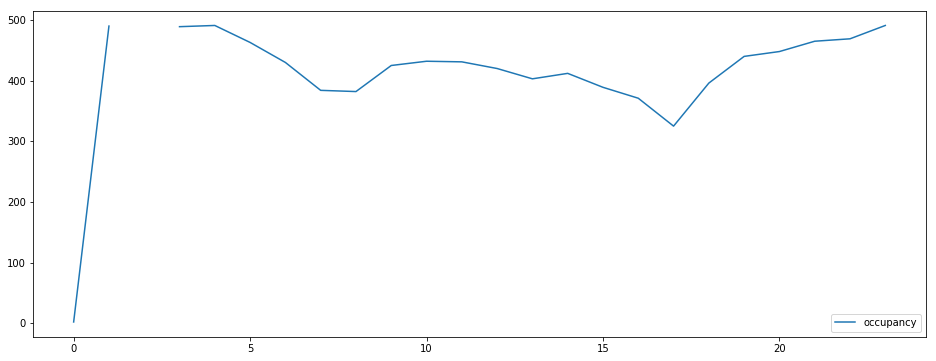

In [5939]:
figure(figsize=(16,6))
# aankuur
index = ovin_groups_aankuur_cum.index;
occ = ovin_groups_aankuur_cum.occ
plt.plot(index, occ,label='occupancy')
plt.legend()

In [5934]:
df_concat = pd.concat([ovin_groups_vertuur, ovin_groups_aankuur], axis=1)
df_concat = df_concat.drop(columns=["AankUur",'VertUur'])
df_concat = df_concat.fillna(0)
df_concat = df_concat.applymap(int)
df_concat
df_concat.to_csv('distribution_departure_arrival_time.csv')

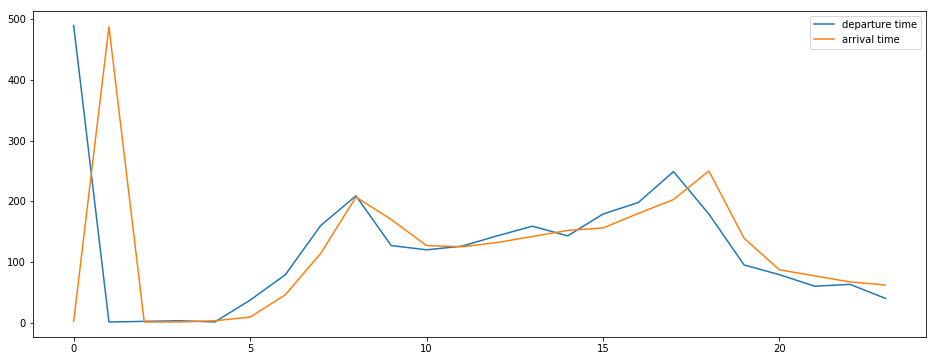

In [5742]:
figure(figsize=(16,6))
# aankuur
v_index = ovin_groups_vertuur.index;
v_permit = ovin_groups_vertuur.Permitholder
v_work = ovin_groups_vertuur.Work
v_visit = ovin_groups_vertuur.Visitor
v_total = ovin_groups_vertuur.Total
# vertuur
a_index = ovin_groups_aankuur.index;
a_permit = ovin_groups_aankuur.Permitholder
a_work = ovin_groups_aankuur.Work
a_visit = ovin_groups_aankuur.Visitor
a_total = ovin_groups_aankuur.Total

# plt.axvline(dt.datetime(2018, 7, 22),label='noordzuidlijn',color='red')
# plt.axvline(dt.datetime(2018, 10, 1),label='start removing on street spots',color='blue')
# plt.axvline(dt.datetime(2018, 11, 30),label='end removing on street spots',color='yellow')
# plt.axvline(dt.datetime(2018, 12, 17),label='market vendors enter garage',color='green')
# plt.plot(v_index, v_permit)
# plt.plot(v_index, v_work)
# plt.plot(v_index, v_visit)
plt.plot(v_index, v_total,label='departure time')
# plt.plot(a_index, a_index)
# plt.plot(a_index, a_work)
# plt.plot(a_index, a_visit)
plt.plot(a_index, a_total,label='arrival time')
plt.legend()

In [5743]:
ovin_groups['VertUur'].mean()

11.305442176870748

In [5744]:
ovin_type['OPID'].nunique()


1186

In [5745]:
ovin_type['Permitholder'].sum()

988

### Permit holder id list (voor parking xml)

In [5746]:
ovin_type_opid = ovin_type_opid.loc[ovin_type_opid['OPID'].isin(df_diaries['OPID'].unique())]

In [5747]:
total_list = ovin_type_opid['OPID'].unique()

In [5748]:
# make list of all permitholders id's
ovin_permitholder = ovin_type_opid.loc[ovin_type_opid['Permitholder'] == 1]
ovin_permitholder_opid_list = ovin_permitholder['OPID'].unique()

len(ovin_permitholder_opid_list)

540

### Non-permit holder id list

In [5749]:
non_ovin_permitholder = ovin_type_opid.loc[ovin_type['Permitholder'] != 1]
non_ovin_permitholder_opid_list = non_ovin_permitholder['OPID'].unique()
len(non_ovin_permitholder_opid_list)

646

### Select right amount of agents

In [5750]:
permit_pop_1 = 0.48
non_permit_pop_1 = 1 - permit_pop_1

total = 600
permit_amount = int(permit_pop_1*total)
non_permit_amount = int(non_permit_pop_1*total)

# minder mensen
permit_amount = 250
non_permit_amount = 250

In [5751]:
permit_pop_1_selected = ovin_permitholder_opid_list[:permit_amount+1]
non_permit_pop_1_selected = non_ovin_permitholder_opid_list[:non_permit_amount+1]

# HIER IS DE PERMIT HOLDER LIST VOOR PARKING.XML
permit_pop_1_selected = permit_pop_1_selected.tolist()
non_permit_pop_1_selected = non_permit_pop_1_selected.tolist()

pop_1_selected = permit_pop_1_selected +non_permit_pop_1_selected

mylist = list(set(pop_1_selected))

In [5752]:
permit_pop_2 = 0.375
non_permit_pop_2 = 1 - permit_pop_2
total=800

permit_amount_2 = int(permit_pop_2*total)
non_permit_amount_2 = int(non_permit_pop_2*total)

# minder mensen
permit_amount = 250
non_permit_amount = 300

In [5753]:
permit_pop_2_selected = ovin_permitholder_opid_list[:permit_amount_2+1]
non_permit_pop_2_selected = non_ovin_permitholder_opid_list[:non_permit_amount_2+1]

# HIER IS DE PERMIT HOLDER LIST VOOR PARKING.XML
permit_pop_2_selected = permit_pop_2_selected.tolist()
non_permit_pop_2_selected = non_permit_pop_2_selected.tolist()

pop_2_selected = permit_pop_2_selected +non_permit_pop_2_selected
len(pop_2_selected)
mylist = list(set(pop_2_selected))

In [5754]:
print(permit_pop_1_selected)

['10101113', '10105032', '10110021', '10115097', '10119034', '10122049', '10130011', '10130056', '10207088', '10208002', '10209022', '10215041', '10216071', '10221100', '10223039', '10234069', '10240096', '10250068', '10318057', '10326066', '10333058', '10334126', '10338065', '10343133', '10350074', '10350075', '10401020', '10401029', '10404122', '10405094', '10409192', '10412072', '10421081', '10428096', '10430061', '10437102', '10442064', '10445037', '10452076', '10509144', '10525053', '10534094', '10534147', '10541092', '10547126', '11109055', '11111005', '11113019', '11116075', '11120027', '11121008', '11123026', '11124005', '11131033', '11139007', '11206090', '11207122', '11210110', '11211103', '11214035', '11214102', '11234138', '11306049', '11311055', '11316091', '11318058', '11328083', '11329088', '11333116', '11337069', '11344053', '11402077', '11406103', '11408010', '11414095', '11419048', '11419084', '11419085', '11423092', '11425120', '11427063', '11428048', '11429105', '11

In [5755]:
part = df_diaries[df_diaries['OPID'].isin(pop_1_selected)]

In [5766]:
count = 0
for i in permit_pop_1_selected:
    if i not in part['OPID'].unique():
        print(i)
        count +=1
print(count)


0


In [5767]:
# #dubbel check of alle ids in diaries zitten
# part_not = df_diaries[~df_diaries['OPID'].isin(pop_1_selected)]

In [5768]:
#aantal agents
part['OPID'].nunique()

502

In [5769]:
part.loc[part['OPID'] == '14302082']

OP      OPID  Jaar Maand Week Dag Weekdag Doel MotiefV VertPC Vertrekp  \
719  0  14302082  2014     1    2  14       3    1      11   1171        1   
720  0  14302082  2014     1    2  14       3    1      11   1017        1   

    AankPC Hvm BHvm VertUur VertMin AankUur AankMin Reisduur HHPers HHSam  \
719   1017   6  nan      17      50      18      15       25      2     2   
720   1171   6  nan      17      50      18      15       25      2     2   

    HHLft1 HHLft2 HHLft3 HHLft4 HHGestInkG Geslacht Leeftijd BetWerk HHAuto  \
719      0      0      0      2          9        2       69       0      2   
720      0      0      0      2          9        2       69       0      2   

    Rijbewijs WoonPC                Datum             VertTijd  \
719         1   1171  2014-01-14 00:00:00  2019-02-01T00:10:00   
720         1   1171  2014-01-14 00:00:00  2019-02-01T17:50:00   

                AankTijd            VertTijd2 Verschil              Diff  \
719  2019-02-01T01:00:00  2014-02-04 07:10:00     drop  20 days 12:55:00   
720  2019-02-01T18:15:00  2014-02-04 07:10:00     drop  20 days 12:55:00   

    ActDuur2          ActDuur       ActMinutes             EindTijd BuurtAdam  \
719      NaT  0 days 16:50:00  0 days 00:05:00  2019-02-01T17:50:00       nan   
720      NaT              NaT  0 days 00:05:00  2019-02-01T18:20:00       nan   

    VerplNr     VerplID          EindTijdAlt CatNum CatText location_id  dest  \
719       0  1430208200  2014-01-14 01:05:00      1    home        0108  0108   
720       1  1430208201  2014-01-14 18:20:00      1    home        0402  1171   

     orig    VertTijdVolgende OPIDVolgende           EindTijd2  
719  1171 2019-02-01 17:50:00     14302082 2019-02-01 17:50:00  
720  0108 2019-02-01 00:10:00     14305109 2019-02-01 18:20:00

# Pandas to XML 

## IndivDiaries

In [5770]:
df_diaries = part.applymap(str)
df_diaries = df_diaries.sort_values(['OPID','VerplID'])
df_diaries.head()
len(df_diaries)

1228

In [5771]:
indivDiaries = etree.Element("indivDiaries")
opid_list = []
for index, row in df_diaries.iterrows():
    # if opid is new
    if row['OPID'] not in opid_list:    
        indivDiary = etree.SubElement(indivDiaries,'indivDiary')
        indivDiary.set('owner',row['OPID'])
    
    episode = etree.SubElement(indivDiary, 'episode')
    episode.set('id',row['VerplID'])
    trip = etree.SubElement(episode, 'trip')
    component = etree.SubElement(trip, 'component')
    component.set('id',row['VerplID'])
    component.set('orig',row['orig'])
    component.set('dest',row['dest'])
    component.set('mode','car')
    component.set('t0',row['VertTijd'])
    component.set('t1',row['AankTijd'])
    activity = etree.SubElement(episode, 'activity')
    activity.set('id',row['VerplID'])
    activity.set('type',row['CatText'])
    activity.set('location',row['dest'])
    activity.set('t0',row['AankTijd'])
    activity.set('t1',row['EindTijd'])
    
    opid_list.append(row['OPID'])
    

In [5772]:
etree.dump(indivDiaries)

<indivDiaries>
  <indivDiary owner="10101113">
    <episode id="1010111300">
      <trip>
        <component id="1010111300" orig="2061" dest="01223" mode="car" t0="2019-02-01T00:10:00" t1="2019-02-01T01:00:00"/>
      </trip>
      <activity id="1010111300" type="home" location="01223" t0="2019-02-01T01:00:00" t1="2019-02-01T11:00:00"/>
    </episode>
    <episode id="1010111301">
      <trip>
        <component id="1010111301" orig="01223" dest="2061" mode="car" t0="2019-02-01T11:00:00" t1="2019-02-01T11:45:00"/>
      </trip>
      <activity id="1010111301" type="leisure" location="2061" t0="2019-02-01T11:45:00" t1="2019-02-01T11:50:00"/>
    </episode>
  </indivDiary>
  <indivDiary owner="10101128">
    <episode id="1010112801">
      <trip>
        <component id="1010112801" orig="1616" dest="0437" mode="car" t0="2019-02-01T16:00:00" t1="2019-02-01T17:15:00"/>
      </trip>
      <activity id="1010112801" type="bringGet" location="0437" t0="2019-02-01T17:15:00" t1="2019-02-01T18:5

## Households

In [5773]:
# new id for household based on OPID as only one person per household filled in the survey
df_diaries['HHID'] = df_diaries.groupby(['OPID'],sort=False).ngroup()

In [5774]:
df_households = df_diaries.copy()

In [5775]:

df_households = df_households[['OPID','HHID','HHPers','HHSam','HHGestInkG','BuurtAdam','WoonPC','HHAuto']]
df_households = df_households.applymap(str)

In [5776]:
households = etree.Element("households")
hhid_list = []
for index, row in df_households.iterrows():

    # if person is new
    if row['HHID'] not in hhid_list:    
        household = etree.SubElement(households,'household')
        household.set('id',row['HHID'])
        socioDemo = etree.SubElement(household, 'socioDemo')
        socioDemo.set('H_Persons',row['HHPers'])
        socioDemo.set('H_SocioEconomicClass',row['HHGestInkG'])
        socioDemo.set('H_Composition',row['HHSam'])
        socioDemo.set('H_HouseholdLocationID',row['WoonPC'])
        socioDemo.set('H_NumberOfCars',row['HHAuto'])

    hhid_list.append(row['HHID'])



In [5777]:
len(df_households)

1228

In [5778]:
etree.dump(households)

<households>
  <household id="0">
    <socioDemo H_Persons="1" H_SocioEconomicClass="10" H_Composition="1" H_HouseholdLocationID="1054" H_NumberOfCars="1"/>
  </household>
  <household id="1">
    <socioDemo H_Persons="3" H_SocioEconomicClass="3" H_Composition="3" H_HouseholdLocationID="1616" H_NumberOfCars="1"/>
  </household>
  <household id="2">
    <socioDemo H_Persons="2" H_SocioEconomicClass="7" H_Composition="2" H_HouseholdLocationID="7241" H_NumberOfCars="1"/>
  </household>
  <household id="3">
    <socioDemo H_Persons="1" H_SocioEconomicClass="1" H_Composition="1" H_HouseholdLocationID="1015" H_NumberOfCars="0"/>
  </household>
  <household id="4">
    <socioDemo H_Persons="2" H_SocioEconomicClass="1" H_Composition="6" H_HouseholdLocationID="2101" H_NumberOfCars="1"/>
  </household>
  <household id="5">
    <socioDemo H_Persons="4" H_SocioEconomicClass="2" H_Composition="3" H_HouseholdLocationID="1055" H_NumberOfCars="1"/>
  </household>
  <household id="6">
    <socioDemo H_

## People

In [5779]:
df_people = df_diaries.copy()


In [5780]:
df_people = df_people[['OPID','HHID','HHPers','HHSam','HHLft1','HHLft2','HHLft3','HHLft4','HHGestInkG','BuurtAdam','WoonPC','Geslacht','Leeftijd','BetWerk','HHAuto','Rijbewijs']]
df_people = df_people.applymap(str)

In [5781]:
len(df_people)

1228

In [5782]:
df_people.head()

OPID HHID HHPers HHSam HHLft1 HHLft2 HHLft3 HHLft4 HHGestInkG  \
0     10101113    0      1     1      0      0      0      1         10   
1549  10101113    0      1     1      0      0      0      1         10   
1638  10101128    1      3     3      0      1      0      2          3   
1     10101128    1      3     3      0      1      0      2          3   
1800  10105021    2      2     2      0      0      0      2          7   

     BuurtAdam WoonPC Geslacht Leeftijd BetWerk HHAuto Rijbewijs  
0          nan   1054        2       35       3      1         1  
1549       nan   1054        2       35       3      1         1  
1638       nan   1616        1       54       3      1         1  
1          nan   1616        1       54       3      1         1  
1800       nan   7241        1       66       0      1         1

In [5783]:
people = etree.Element("people")
id_list = []
for index, row in df_people.iterrows():
    # if person is a new person
    if row['OPID'] not in id_list:  
        person = etree.SubElement(people,'person')
        person.set('id',row['OPID'])
        person.set('householdId', row['HHID'])
        socioDemo = etree.SubElement(person, 'socioDemo')
        socioDemo.set('P_Workstatus',row['BetWerk'])
        socioDemo.set('P_Age',row['Leeftijd'])
        socioDemo.set('P_Gender',row['Geslacht'])
        socioDemo.set('P_DriversLicense',row['Rijbewijs'])
    else:
        pass
    
    id_list.append(row['OPID'])
    

In [5784]:
print(len(id_list))

1228


In [5785]:
etree.dump(people)

<people>
  <person id="10101113" householdId="0">
    <socioDemo P_Workstatus="3" P_Age="35" P_Gender="2" P_DriversLicense="1"/>
  </person>
  <person id="10101128" householdId="1">
    <socioDemo P_Workstatus="3" P_Age="54" P_Gender="1" P_DriversLicense="1"/>
  </person>
  <person id="10105021" householdId="2">
    <socioDemo P_Workstatus="0" P_Age="66" P_Gender="1" P_DriversLicense="1"/>
  </person>
  <person id="10105032" householdId="3">
    <socioDemo P_Workstatus="0" P_Age="57" P_Gender="1" P_DriversLicense="1"/>
  </person>
  <person id="10107007" householdId="4">
    <socioDemo P_Workstatus="3" P_Age="26" P_Gender="2" P_DriversLicense="1"/>
  </person>
  <person id="10110021" householdId="5">
    <socioDemo P_Workstatus="0" P_Age="34" P_Gender="2" P_DriversLicense="1"/>
  </person>
  <person id="10115053" householdId="6">
    <socioDemo P_Workstatus="3" P_Age="19" P_Gender="1" P_DriversLicense="1"/>
  </person>
  <person id="10115097" householdId="7">
    <socioDemo P_Workstatu

## Locations

In [5786]:
df_locations = df_locations.applymap(str)

In [5788]:
locations = etree.Element('locations')
# for i in df_merged.iterrows():
    
for i, row in enumerate(df_locations.itertuples(index=False)):
    location = etree.SubElement(locations,'location')
    location.set('id',row[0])
    location.set('x',row[2])
    location.set('y',row[3])
    location.set('crs','EPSG:4326')
    locationActivities = etree.SubElement(location,'locationActivities')
    locationActivity = etree.SubElement(locationActivities,'locationActivity')
    locationActivity.set('type',row[1])
    operations = etree.SubElement(locationActivity,'operations')
    operations.set('type','alwaysOpen')
    
    

In [5789]:
etree.dump(locations)

<locations>
  <location id="00" x="4.8894176" y="52.3573483" crs="EPSG:4326">
    <locationActivities>
      <locationActivity type="home">
        <operations type="alwaysOpen"/>
      </locationActivity>
    </locationActivities>
  </location>
  <location id="01" x="4.890047099999999" y="52.357503799999996" crs="EPSG:4326">
    <locationActivities>
      <locationActivity type="home">
        <operations type="alwaysOpen"/>
      </locationActivity>
    </locationActivities>
  </location>
  <location id="02" x="4.8897702" y="52.3573229" crs="EPSG:4326">
    <locationActivities>
      <locationActivity type="home">
        <operations type="alwaysOpen"/>
      </locationActivity>
    </locationActivities>
  </location>
  <location id="03" x="4.8901205" y="52.3575041" crs="EPSG:4326">
    <locationActivities>
      <locationActivity type="home">
        <operations type="alwaysOpen"/>
      </locationActivity>
    </locationActivities>
  </location>
  <location id="04" x="4.89020859999

In [5790]:
df_addr_outside = df_addr_outside.applymap(str)

In [5791]:
# locations1 = etree.Element('locations1')    

for index, row in df_addr_outside.iterrows():
    location = etree.SubElement(locations,'location')
    if row['id'] in pc_list:
        location.set('id',row['id'])
    else:
        location.set('id','000')
    location.set('x',row['x'])
    location.set('y',row['y'])
    location.set('crs','EPSG:4326')
    locationActivities = etree.SubElement(location,'locationActivities')
    # home
    locationActivity = etree.SubElement(locationActivities,'locationActivity')
    locationActivity.set('type','home')
    operations = etree.SubElement(locationActivity,'operations')
    operations.set('type','alwaysOpen')
    # work
    locationActivity = etree.SubElement(locationActivities,'locationActivity')
    locationActivity.set('type','work')
    operations = etree.SubElement(locationActivity,'operations')
    operations.set('type','alwaysOpen')
    # bringGet
    locationActivity = etree.SubElement(locationActivities,'locationActivity')
    locationActivity.set('type','bringGet')
    operations = etree.SubElement(locationActivity,'operations')
    operations.set('type','alwaysOpen')
    # dailyShop
    locationActivity = etree.SubElement(locationActivities,'locationActivity')
    locationActivity.set('type','dailyShop')
    operations = etree.SubElement(locationActivity,'operations')
    operations.set('type','alwaysOpen')
    # service
    locationActivity = etree.SubElement(locationActivities,'locationActivity')
    locationActivity.set('type','service')
    operations = etree.SubElement(locationActivity,'operations')
    operations.set('type','alwaysOpen')
    # socVisit
    locationActivity = etree.SubElement(locationActivities,'locationActivity')
    locationActivity.set('type','socVisit')
    operations = etree.SubElement(locationActivity,'operations')
    operations.set('type','alwaysOpen')
    # leisure
    locationActivity = etree.SubElement(locationActivities,'locationActivity')
    locationActivity.set('type','leisure')
    operations = etree.SubElement(locationActivity,'operations')
    operations.set('type','alwaysOpen')
    # touring
    locationActivity = etree.SubElement(locationActivities,'locationActivity')
    locationActivity.set('type','touring')
    operations = etree.SubElement(locationActivity,'operations')
    operations.set('type','alwaysOpen')
    # other
    locationActivity = etree.SubElement(locationActivities,'locationActivity')
    locationActivity.set('type','other')
    operations = etree.SubElement(locationActivity,'operations')
    operations.set('type','alwaysOpen')
    
    

In [5792]:
etree.dump(locations)

<locations>
  <location id="00" x="4.8894176" y="52.3573483" crs="EPSG:4326">
    <locationActivities>
      <locationActivity type="home">
        <operations type="alwaysOpen"/>
      </locationActivity>
    </locationActivities>
  </location>
  <location id="01" x="4.890047099999999" y="52.357503799999996" crs="EPSG:4326">
    <locationActivities>
      <locationActivity type="home">
        <operations type="alwaysOpen"/>
      </locationActivity>
    </locationActivities>
  </location>
  <location id="02" x="4.8897702" y="52.3573229" crs="EPSG:4326">
    <locationActivities>
      <locationActivity type="home">
        <operations type="alwaysOpen"/>
      </locationActivity>
    </locationActivities>
  </location>
  <location id="03" x="4.8901205" y="52.3575041" crs="EPSG:4326">
    <locationActivities>
      <locationActivity type="home">
        <operations type="alwaysOpen"/>
      </locationActivity>
    </locationActivities>
  </location>
  <location id="04" x="4.89020859999

# Write to XML

In [5796]:
with open('/Users/miloubisseling/Documents/UvA/DataScience/Thesis/datascience-thesis/data/simpark/generated/xsd/schedules_feb2.xml','wb') as f:
    f.write(b'<?xml version="1.0" encoding="UTF-8"?><diaries:diaries xmlns:diaries="ns://be.uhasselt.imob/diaries">')
    f.write(b'<generated/><validation><validate rule="completenessSchedulesHouseholds"/><validate rule="completenessSchedulesLocations"/><validate rule="completenessSchedulesPeople"/><validate rule="completenessSchedulesDiaries"/><validate rule="completenessMetaValidation"/><validate rule="completenessMetaHouseholds"/><validate rule="completenessMetaPeople"/><validate rule="nonOverlappingOperations"/><validate rule="validPeriodsDiaries"/><validate rule="validPeriodsOperations"/><validate rule="nonOverlappingDiaries"/></validation><gpsRecordings/>')
    f.write(etree.tostring(households,pretty_print=True))
    f.write(etree.tostring(people,pretty_print=True))
    f.write(etree.tostring(locations,pretty_print=True))
    f.write(etree.tostring(indivDiaries,pretty_print=True))
    f.write(b'</diaries:diaries>')
    